In [ ]:
# Импорт библиотеки для обработки данных
import numpy as np # Вычисления и работа с многомерными массивами
import pandas as pd # Анализ и манипуляция с табличными данными

# Импорт библиотек для визуального анализа
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Инструменты машинного обучения
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
# Прочтем и выведем содержимое DataFrame
df = pd.read_csv('data_lab_1.csv')
print(df)

            price  total_area  rooms  ceiling_height  floors_total  \
0      13000000.0      108.00      3            2.70          16.0   
1       3350000.0       40.40      1             NaN          11.0   
2       5196000.0       56.00      2             NaN           5.0   
3      64900000.0      159.00      3             NaN          14.0   
4      10000000.0      100.00      2            3.03          14.0   
...           ...         ...    ...             ...           ...   
23694   9700000.0      133.81      3            3.70           5.0   
23695   3100000.0       59.00      3             NaN           5.0   
23696   2500000.0       56.70      2             NaN           3.0   
23697  11475000.0       76.75      2            3.00          17.0   
23698   1350000.0       32.30      1            2.50           5.0   

       living_area  floor  studio  kitchen_area  balcony  airports_distance  \
0             51.0      8   False         25.00      NaN            18863.0   
1

### **1. Предобработать данные, обосновать выбор методов:**

*   Проверка соответствия типов данных

In [ ]:
#Проверим типы данных
print(df.dtypes)

price                float64
total_area           float64
rooms                  int64
ceiling_height       float64
floors_total         float64
living_area          float64
floor                  int64
studio                  bool
kitchen_area         float64
balcony              float64
airports_distance    float64
centers_distance     float64
parks_nearest        float64
ponds_nearest        float64
dtype: object


Вывод:

1)price относится к количественным признакам,
поскольку представляет собой непрерывную числовую переменную,
допускающую сравнение значений по шкале отношений.
Возможность упорядочивания объектов по возрастанию или убыванию стоимости,
а также вычисление разности между значениями подтверждает количественную природу данного признака.

2)total_area также является количественным признаком, так как возможно сравнение общей площади квартир.



In [ ]:
#Рассмотрим уникальные значения количества комнат
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

3)rooms - количество комнат является категориальной переменной, так как принимает значение из небольшого, ограниченного набора. И мы не можем сказать, что 4 комнаты "в два раза лучше" 2 комнат в строгом математическом смысле.

4)ceiling_height - высота потолков является количественной переменной.



In [ ]:
#Рассмотрим уникальные значения количества этажей в доме
df['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

5)floors_total - количество этажей в доме является категориальной переменной.

6)living_area - жилая площадь является количественной переменной.





In [ ]:
#Рассмотрим уникальные значения этажей квартиры
df['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

7)floor - этаж квартиры является категориальной переменной.

8)studio - категориальная переменная.

9)kitchen_area - размер кухни количественная переменная.

In [ ]:
#Рассмотрим уникальные значения возможных балконов
df['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

10)balcony - категориальная переменная.

11)airports_distance - расстояние до аэропорта, количественная.

12)centers_distance - расстояние до центра города, количественная.

13)parks_nearest - расстояние до ближайшего парка, количественная.

14)ponds_nearest - расстояние до ближайшего водоема, количественная.


Вывод: таким образом из всего набора 5 признаков являются категориальными, а остальные 9 количественными.

*   Обработка пропущенных значений

In [ ]:
# Краткая сводка о df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              23699 non-null  float64
 1   total_area         23699 non-null  float64
 2   rooms              23699 non-null  int64  
 3   ceiling_height     14504 non-null  float64
 4   floors_total       23613 non-null  float64
 5   living_area        21796 non-null  float64
 6   floor              23699 non-null  int64  
 7   studio             23699 non-null  bool   
 8   kitchen_area       21421 non-null  float64
 9   balcony            12180 non-null  float64
 10  airports_distance  18157 non-null  float64
 11  centers_distance   18180 non-null  float64
 12  parks_nearest      8079 non-null   float64
 13  ponds_nearest      9110 non-null   float64
dtypes: bool(1), float64(11), int64(2)
memory usage: 2.4 MB


In [ ]:
#Рассмотрим количество пропусков в признаках
print(df.isnull().sum())

price                    0
total_area               0
rooms                    0
ceiling_height        9195
floors_total            86
living_area           1903
floor                    0
studio                   0
kitchen_area          2278
balcony              11519
airports_distance     5542
centers_distance      5519
parks_nearest        15620
ponds_nearest        14589
dtype: int64


Можно увидеть, что в следующих столбцах есть пропущенные переменные:

1) ceiling_height - высота потолков (количественная),

2) floors_total - количество этажей в доме (категориальная),

3) living_area - жилая площадь квартиры (количественная),

4) kitchen_area - площадь кухни (количественная),

5) balcony - наличие балкона или балконов (категориальная),

6) airports_distance - расстояние до аэропорта (количественная),

7) centers_distance - расстояние до центра города (количественная),

8) parks_nearest - расстояние для ближайшего парка (количественная),

9) ponds_nearest - расстояние до ближайшего водоема (количественная).

Большинство пропущенных переменных есть в признаках:

balcony, parks_nearest, ponds_nearest.

In [ ]:
# Доля пропусков в процентах
missing_ratio = df[['ceiling_height', 'floors_total', 'living_area',
                   'kitchen_area', 'balcony', 'airports_distance', 'centers_distance',
                   'parks_nearest', 'ponds_nearest']].isnull().mean() * 100
print("Доля пропусков (%):")
print(missing_ratio.round(2))

Доля пропусков (%):
ceiling_height       38.80
floors_total          0.36
living_area           8.03
kitchen_area          9.61
balcony              48.61
airports_distance    23.38
centers_distance     23.29
parks_nearest        65.91
ponds_nearest        61.56
dtype: float64


In [ ]:
# Для начала рассмотрим следующие количественные признаки
num_cols = ['ceiling_height', 'living_area',
            'kitchen_area', 'airports_distance', 'centers_distance']
# Заменим пропуски медианным значением, так как медиана менее чувствительна к выбросам/аномалиям
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [ ]:
# Далее рассмотрим категориальный признак, означающий количество этажей в доме
# Так как доля пропусков для общего числа этажей мала, то можем удалить пропуски.
df = df.dropna(subset=['floors_total'])

In [ ]:
# Наблюдается большое количество пропущенных переменных в признаке, указывающем на наличие балконов
# Удаление пропусков приведет к потере 48.6% данных, а замена на моду приведет к неправильной интерпретации, поэтому создадим новую категорию 'Unknown'
df['balcony'].fillna('Unknown', inplace=True)

/tmp/ipython-input-4288444219.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['balcony'].fillna('Unknown', inplace=True)
/tmp/ipython-input-4288444219.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['balcony'].fillna('Unknown', inplace=True)


In [ ]:
# Пропуски в расстоянии до водоемов и парков можно заменить на большое число, означающее, что объекты находятся очень далеко
parks_q95 = df['parks_nearest'].quantile(0.95)
ponds_q95 = df['ponds_nearest'].quantile(0.95)

df['parks_nearest'] = df['parks_nearest'].fillna(parks_q95)
df['ponds_nearest'] = df['ponds_nearest'].fillna(ponds_q95)

In [ ]:
# Проверим еще раз данные на отсутствие пропусков
print(df.isnull().sum())

price                0
total_area           0
rooms                0
ceiling_height       0
floors_total         0
living_area          0
floor                0
studio               0
kitchen_area         0
balcony              0
airports_distance    0
centers_distance     0
parks_nearest        0
ponds_nearest        0
dtype: int64



*   Обработка дубликатов


In [ ]:
#Рассмотрим количество дубликатов:
print(f"Дубликатов: {df.duplicated().sum()}")

Дубликатов: 1


In [ ]:
# Рассмотрим все дублированные строки
duplicates = df[df.duplicated(keep=False)]
print(f"Все дублированные строки ({len(duplicates)} записей):")
print(duplicates)

Все дублированные строки (2 записей):
          price  total_area  rooms  ceiling_height  floors_total  living_area  \
9661  2533531.0        42.5      1            2.56          18.0         19.8   
9886  2533531.0        42.5      1            2.56          18.0         19.8   

      floor  studio  kitchen_area  balcony  airports_distance  \
9661      7   False           9.1  Unknown            26726.0   
9886      7   False           9.1  Unknown            26726.0   

      centers_distance  parks_nearest  ponds_nearest  
9661           13098.5          967.0          977.0  
9886           13098.5          967.0          977.0  


In [ ]:
#Удаляем дублированные строки:
df = df.drop_duplicates()

In [ ]:
#Проверяем на наличие дубликатов:
print(f"Дубликатов: {df.duplicated().sum()}")

Дубликатов: 0


*   Обработка аномальных значений и выбросов

Перед обработкой аномальных значений проведём визуальный анализ распределения числовых признаков.

Рассмотрим аномальные значения и выбросы для цены квартир (price)

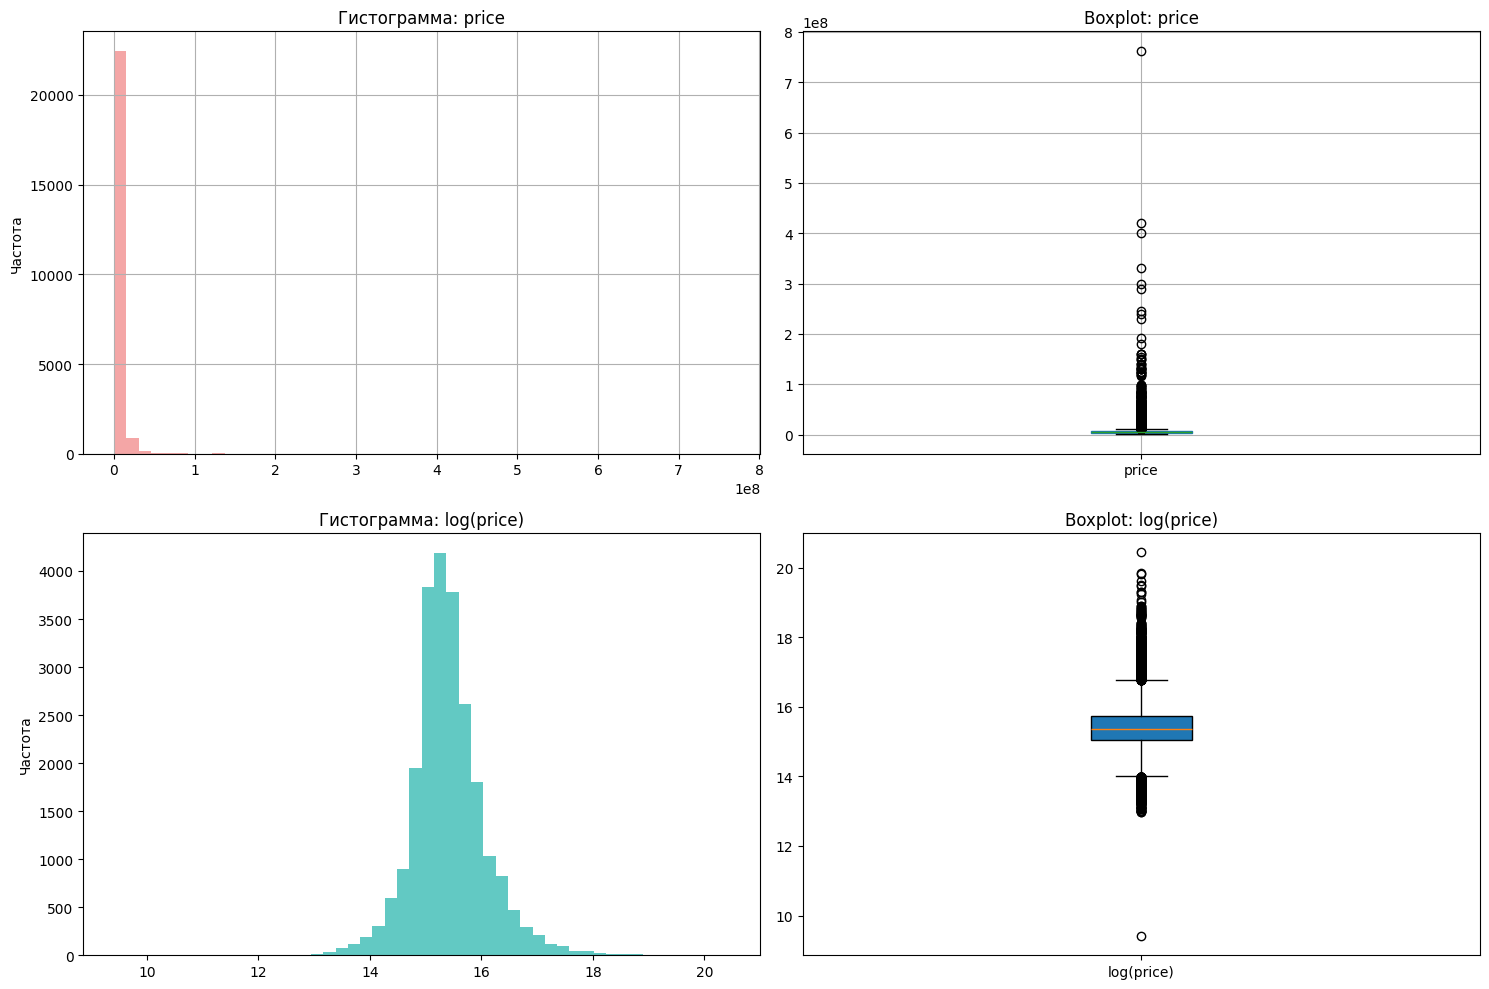

Оригинальные данные:
count    2.361200e+04
mean     6.540725e+06
std      1.090192e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: price, dtype: float64

Асимметрия: 25.79

Логарифмированные данные:
Минимум: 9.41
Максимум: 20.45
Среднее: 15.41
Медиана: 15.35
Стандартное отклонение: 0.65
Асимметрия: 0.68


In [ ]:
# Для начала рассмотрим price
col = 'price'

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))


# Гистограмма
df[col].hist(bins=50, ax=ax1, alpha=0.7, color='lightcoral')
ax1.set_title(f'Гистограмма: {col}')
ax1.set_ylabel('Частота')

# Boxplot
df[[col]].boxplot(ax=ax2, patch_artist=True)
ax2.set_title(f'Boxplot: {col}')

# Логарифмированные данные
log_price = np.log1p(df[col])  # Временная переменная

# Гистограмма логарифмированных данных
ax3.hist(log_price, bins=50, alpha=0.7, color='lightseagreen')
ax3.set_title(f'Гистограмма: log({col})')
ax3.set_ylabel('Частота')

# Boxplot логарифмированных данных
ax4.boxplot(log_price, patch_artist=True)
ax4.set_title(f'Boxplot: log({col})')
ax4.set_xticklabels([f'log({col})'])  # Подписываем ось

plt.tight_layout()
plt.show()

# Статистика для сравнения
print("Оригинальные данные:")
print(df[col].describe())
print(f"\nАсимметрия: {df[col].skew():.2f}")

print("\nЛогарифмированные данные:")
print(f"Минимум: {log_price.min():.2f}")
print(f"Максимум: {log_price.max():.2f}")
print(f"Среднее: {log_price.mean():.2f}")
print(f"Медиана: {log_price.median():.2f}")
print(f"Стандартное отклонение: {log_price.std():.2f}")
print(f"Асимметрия: {log_price.skew():.2f}")

По графику гистограммы: price можно увидеть, что большинство наблюдений сосредоточено в левой части графика и большинство квартир имеют сравнительно низкую цену, а дорогие объекты создают "хвост".
Если рассматривать гистограмму: log(price), то можно увидеть, что распределение стало ближе к нормальному и ассиметрия значительно уменьшилась.





Если рассматривать Boxplot: price, то можно увидеть много выбросов, когда точки далеко за пределами "усов". Ящик очень маленький относительно общего разамаха данных и медиана смещена к нижней границе ящика.
Таким образом, есть значительный разброс цен от очень дешевых до очень дорогих и данные загрязнены экстремальными значениями.
По Boxplot: log(price) видно, что выбросов стало меньше и ящик занимает большую часть межквартильного размаха, а медиана расположена ближе к центру ящика.


Таким образом, используем перцентиль для удаления выбросов.

In [ ]:
# Определим границы
lower_bound = df['price'].quantile(0.01)   # 1-й перцентиль
upper_bound = df['price'].quantile(0.99)   # 99-й перцентиль
# Находим выбросы
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Выбросов по перцентилям: {len(outliers)} ({len(outliers)/len(df):.2%})")

# Удаляем выбросы

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

Выбросов по перцентилям: 460 (1.95%)


Рассмотрим аномальные значения в признаке общая площадь (total_area)

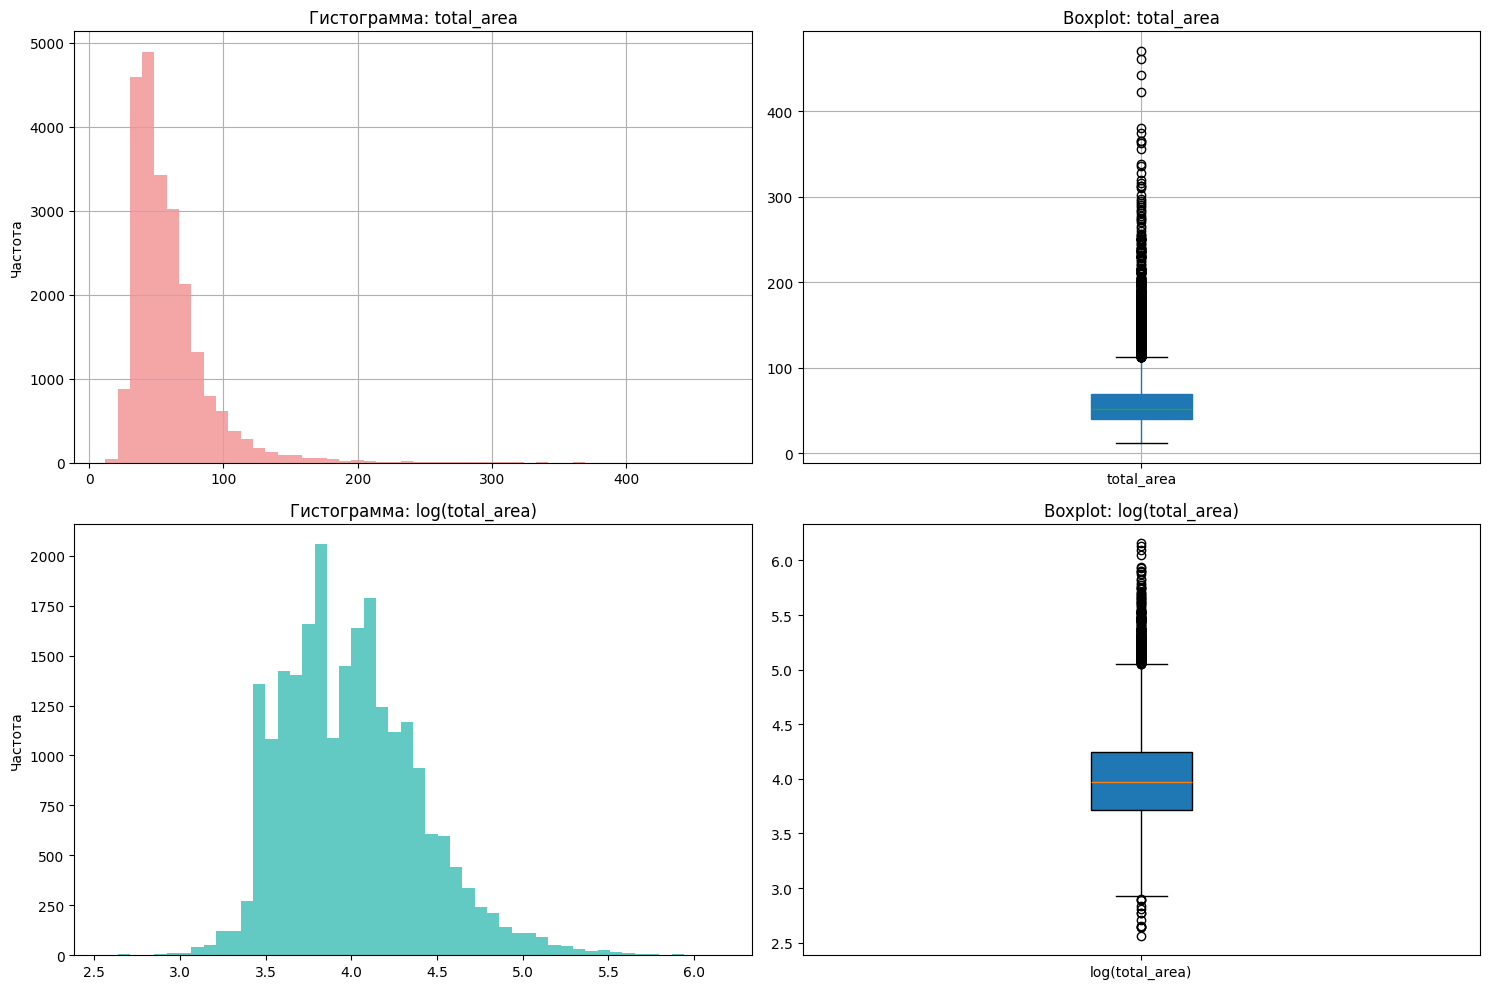

Оригинальные данные:
count    23152.000000
mean        58.839018
std         29.489309
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        470.300000
Name: total_area, dtype: float64

Асимметрия: 3.00

Логарифмированные данные:
Минимум: 2.56
Максимум: 6.16
Среднее: 4.00
Медиана: 3.97
Стандартное отклонение: 0.40
Асимметрия: 0.69


In [ ]:
# Рассмотрим total_area
col = 'total_area'

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Оригинальные данные

# Гистограмма
df[col].hist(bins=50, ax=ax1, alpha=0.7, color='lightcoral')
ax1.set_title(f'Гистограмма: {col}')
ax1.set_ylabel('Частота')

# Boxplot
df[[col]].boxplot(ax=ax2, patch_artist=True)
ax2.set_title(f'Boxplot: {col}')

# Логарифмированные данные
log_price = np.log1p(df[col])  # Временная переменная

# Гистограмма логарифмированных данных
ax3.hist(log_price, bins=50, alpha=0.7, color='lightseagreen')
ax3.set_title(f'Гистограмма: log({col})')
ax3.set_ylabel('Частота')

# Boxplot логарифмированных данных
ax4.boxplot(log_price, patch_artist=True)
ax4.set_title(f'Boxplot: log({col})')
ax4.set_xticklabels([f'log({col})'])  # Подписываем ось

plt.tight_layout()
plt.show()

# Статистика для сравнения
print("Оригинальные данные:")
print(df[col].describe())
print(f"\nАсимметрия: {df[col].skew():.2f}")

print("\nЛогарифмированные данные:")
print(f"Минимум: {log_price.min():.2f}")
print(f"Максимум: {log_price.max():.2f}")
print(f"Среднее: {log_price.mean():.2f}")
print(f"Медиана: {log_price.median():.2f}")
print(f"Стандартное отклонение: {log_price.std():.2f}")
print(f"Асимметрия: {log_price.skew():.2f}")

По гистограмме: total_area можно увидеть ярко выраженный хвост вправо, основная масса данных сосредоточена в диапазоне от 20 до 100 м², также можно увидеть резкий пик в области малых площадей (40-60 м²).
Таким образом, это типичное рапсределение для жилой недвижимости, когда много студий и малогабаритных квартир и рынок в основном состоит из квартир стандартных размеров и небольшого количества "элитных квартир"
А по гистограмме: log(total_area) распределение стало ближе к нормальному, ассиметрия сильно уменьшилась.


По Boxplot: total_area множество точек далеко за "усами", также очень маленький ящик относительно общего размаха данных и медиана смещена в нижнюю часть ящика.
По Boxplot: log(total_area) видим, что ящик занимает большую часть межквартильного размаха, медиана расположена ближе к центру ящика

Удалим выбросы и определим их с помощью перцентилей.

In [ ]:
# Определим границы
lower_bound = df['total_area'].quantile(0.01)   # 1-й перцентиль
upper_bound = df['total_area'].quantile(0.99)   # 99-й перцентиль
# Находим выбросы
outliers = df[(df['total_area'] < lower_bound) | (df['total_area'] > upper_bound)]
print(f"Выбросов по перцентилям: {len(outliers)} ({len(outliers)/len(df):.2%})")

# Удаляем выбросы

df = df[(df['total_area'] >= lower_bound) & (df['total_area'] <= upper_bound)]

Выбросов по перцентилям: 460 (1.99%)


Рассмотрим аномальные значения в признаке высота потолков (ceiling_height)

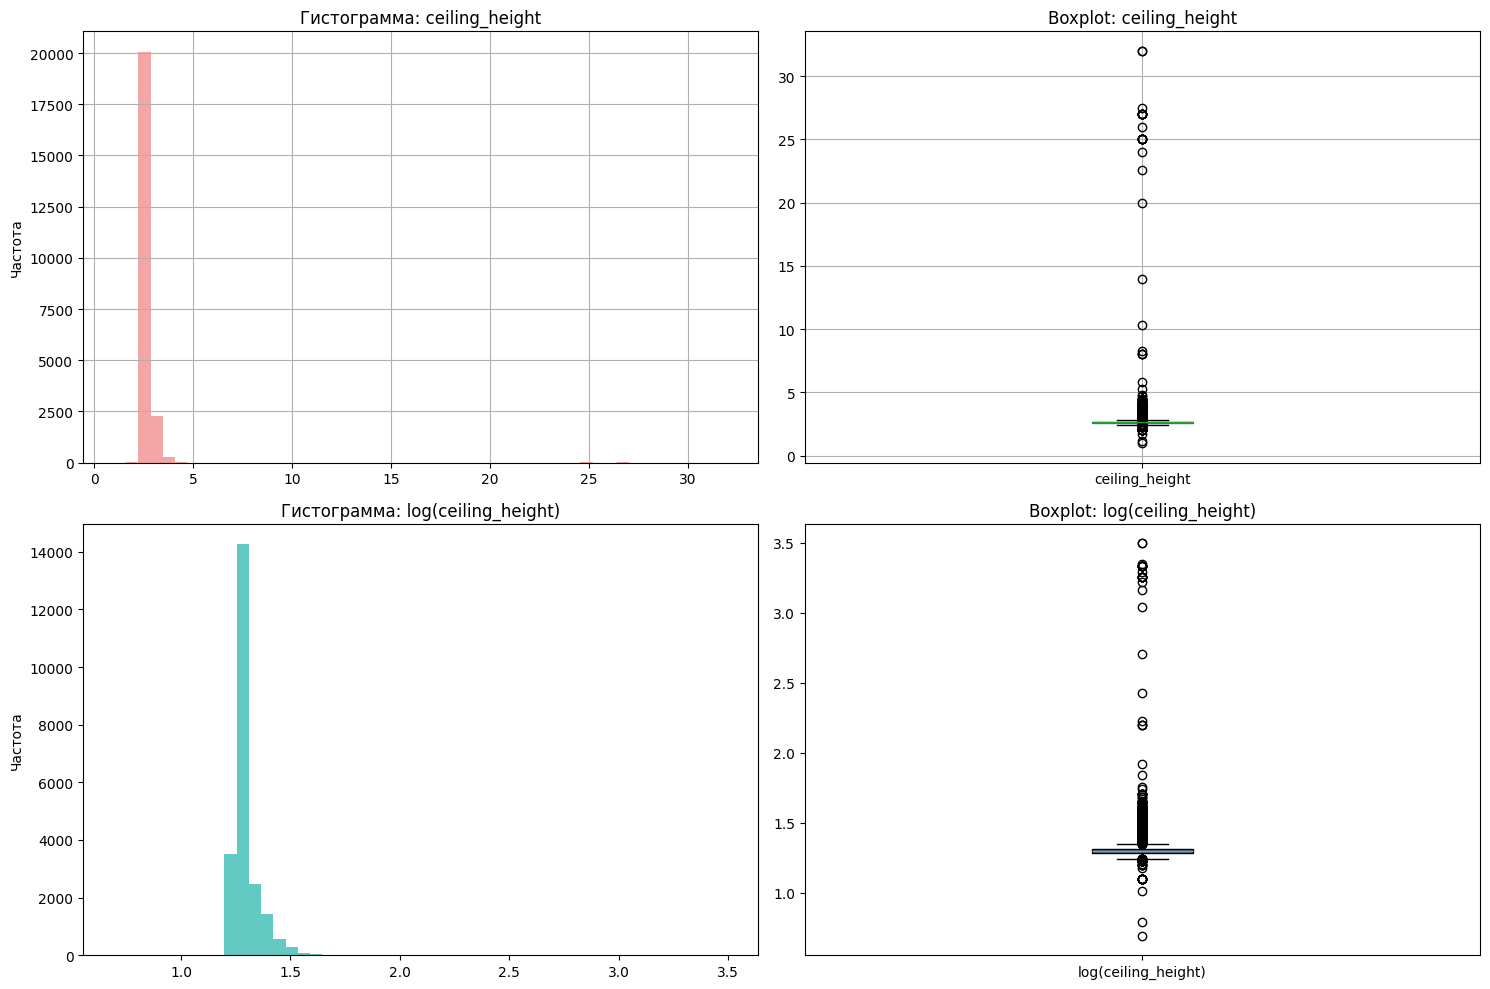

Оригинальные данные:
count    22692.000000
mean         2.713341
std          0.754065
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

Асимметрия: 28.94

Логарифмированные данные:
Минимум: 0.69
Максимум: 3.50
Среднее: 1.31
Медиана: 1.29
Стандартное отклонение: 0.08
Асимметрия: 14.58


In [ ]:
# Рассмотрим ceiling_height
col = 'ceiling_height'

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Оригинальные данные

# Гистограмма
df[col].hist(bins=50, ax=ax1, alpha=0.7, color='lightcoral')
ax1.set_title(f'Гистограмма: {col}')
ax1.set_ylabel('Частота')

# Boxplot
df[[col]].boxplot(ax=ax2, patch_artist=True)
ax2.set_title(f'Boxplot: {col}')

# Логарифмированные данные
log_price = np.log1p(df[col])  # Временная переменная

# Гистограмма логарифмированных данных
ax3.hist(log_price, bins=50, alpha=0.7, color='lightseagreen')
ax3.set_title(f'Гистограмма: log({col})')
ax3.set_ylabel('Частота')

# Boxplot логарифмированных данных
ax4.boxplot(log_price, patch_artist=True)
ax4.set_title(f'Boxplot: log({col})')
ax4.set_xticklabels([f'log({col})'])  # Подписываем ось

plt.tight_layout()
plt.show()

# Статистика для сравнения
print("Оригинальные данные:")
print(df[col].describe())
print(f"\nАсимметрия: {df[col].skew():.2f}")

print("\nЛогарифмированные данные:")
print(f"Минимум: {log_price.min():.2f}")
print(f"Максимум: {log_price.max():.2f}")
print(f"Среднее: {log_price.mean():.2f}")
print(f"Медиана: {log_price.median():.2f}")
print(f"Стандартное отклонение: {log_price.std():.2f}")
print(f"Асимметрия: {log_price.skew():.2f}")

Если рассматривать Boxplot: ceiling_height, то можно увидеть, что ящик маленький, а "усы" очень длинные, что говорит о очень большом количестве выбросов.

В высоте потолков наблюдаются невозможные для жилых помещений размеры. Так, экстремальное значение, встречающееся в данных 32 метра. Преобладающая масса значений канцентрируется около 2,5-3,5 метров.

Так как данные собраны по г. Санкт-Петербург, то тогда минимальная высота потолков в Санкт-Петербурге для жилых помещений должна быть не менее 2,5 метров, согласно строительным нормам, но в современных новостройках комфорт- и бизнес-класса этот показатель составляет от 2,6–2,7 м, а в элитном сегменте — от 3 метров и выше.

Максимальная высота потолков в Санкт-Петербурге может достигать 4–5 метров.

In [ ]:
# Запоминаем исходный размер
original_size = len(df)

# Создаем маску для фильтрации
mask = (df['ceiling_height'] >= 2.5) & (df['ceiling_height'] <= 5)

# Подсчитываем статистику ДО удаления
removed_low = len(df[df['ceiling_height'] < 2.5])
removed_high = len(df[df['ceiling_height'] > 5])
total_removed = removed_low + removed_high

# Удаляем строки напрямую из df
df = df[mask]

print(f"Исходное количество записей: {original_size}")
print(f"Удалено записей с высотой < 2.5м: {removed_low}")
print(f"Удалено записей с высотой > 5м: {removed_high}")
print(f"Всего удалено записей: {total_removed}")
print(f"Осталось записей: {len(df)}")
print(f"Доля удаленных: {(total_removed/original_size)*100:.2f}%")

Исходное количество записей: 22692
Удалено записей с высотой < 2.5м: 72
Удалено записей с высотой > 5м: 29
Всего удалено записей: 101
Осталось записей: 22591
Доля удаленных: 0.45%


Рассмотрим аномальные значения в признаке жилая площадь (living_area)

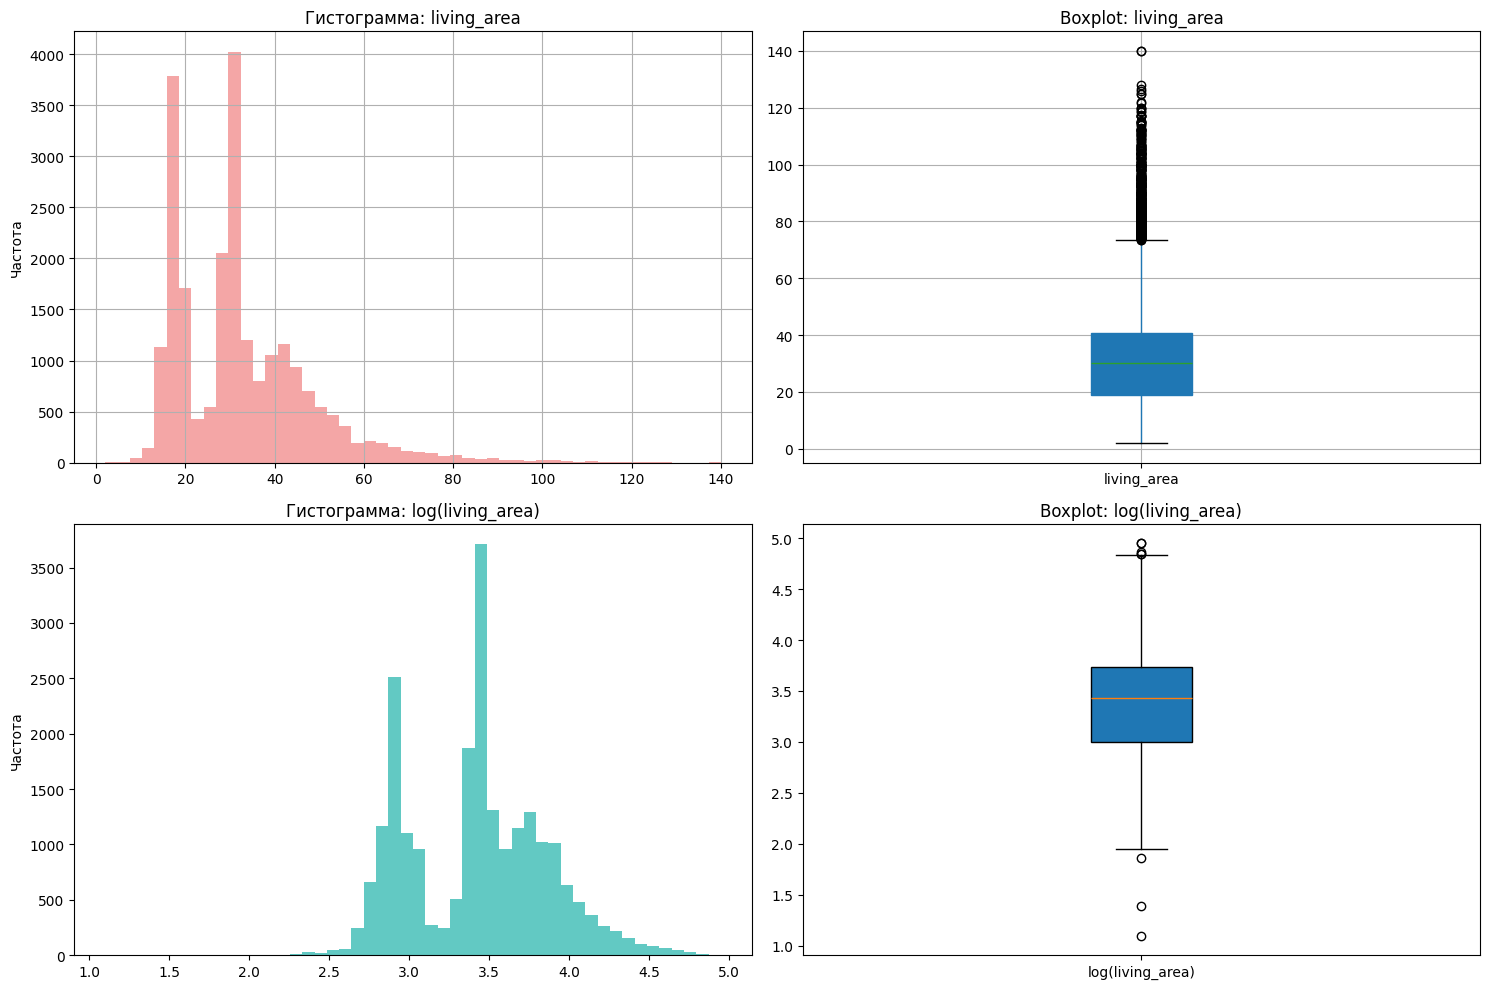

Оригинальные данные:
count    22591.000000
mean        32.685944
std         15.626413
min          2.000000
25%         19.000000
50%         30.000000
75%         40.800000
max        140.000000
Name: living_area, dtype: float64

Асимметрия: 1.51

Логарифмированные данные:
Минимум: 1.10
Максимум: 4.95
Среднее: 3.42
Медиана: 3.43
Стандартное отклонение: 0.43
Асимметрия: 0.21


In [ ]:
# Рассмотрим living_area
col = 'living_area'

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Оригинальные данные

# Гистограмма
df[col].hist(bins=50, ax=ax1, alpha=0.7, color='lightcoral')
ax1.set_title(f'Гистограмма: {col}')
ax1.set_ylabel('Частота')

# Boxplot
df[[col]].boxplot(ax=ax2, patch_artist=True)
ax2.set_title(f'Boxplot: {col}')

# Логарифмированные данные
log_price = np.log1p(df[col])  # Временная переменная

# Гистограмма логарифмированных данных
ax3.hist(log_price, bins=50, alpha=0.7, color='lightseagreen')
ax3.set_title(f'Гистограмма: log({col})')
ax3.set_ylabel('Частота')

# Boxplot логарифмированных данных
ax4.boxplot(log_price, patch_artist=True)
ax4.set_title(f'Boxplot: log({col})')
ax4.set_xticklabels([f'log({col})'])  # Подписываем ось

plt.tight_layout()
plt.show()

# Статистика для сравнения
print("Оригинальные данные:")
print(df[col].describe())
print(f"\nАсимметрия: {df[col].skew():.2f}")

print("\nЛогарифмированные данные:")
print(f"Минимум: {log_price.min():.2f}")
print(f"Максимум: {log_price.max():.2f}")
print(f"Среднее: {log_price.mean():.2f}")
print(f"Медиана: {log_price.median():.2f}")
print(f"Стандартное отклонение: {log_price.std():.2f}")
print(f"Асимметрия: {log_price.skew():.2f}")

Рассматривая гистограмму: living_area можно заметить сильную правостороннюю ассиметрию, длинный "хвост" справа. Также, можно заметить резкие пики в области малых значений (20-40 м²) и небольшое количество объектов с общей площадью.
По гистограмме: log(living_area) распределение значительно уменьшилось, ассиметрия сильно уменьшилась.


Если же рассматривать Boxplot: living_area, то можно сделать вывод, что есть достаточно много точек за пределами "усов".
По Boxplot: log(living_area) видно, что выбросов стало меньше и ящик занимает большую часть межквартильного размаха.

Удалим выбросы и определим их с помощью перцентилей.

In [ ]:
# Определим границы
lower_bound = df['living_area'].quantile(0.01)   # 1-й перцентиль
upper_bound = df['living_area'].quantile(0.99)   # 99-й перцентиль
# Находим выбросы
outliers = df[(df['living_area'] < lower_bound) | (df['living_area'] > upper_bound)]
print(f"Выбросов по перцентилям: {len(outliers)} ({len(outliers)/len(df):.2%})")

# Удаляем выбросы

df = df[(df['living_area'] >= lower_bound) & (df['living_area'] <= upper_bound)]

Выбросов по перцентилям: 442 (1.96%)


Однако, прежде чем перейти к следующему признаку рассмотрим соответствие логике соотношения жилой и общей площади. То есть нужно проверить, что жилая площадь не превышает общую.

In [ ]:
# Проверка соотношения жилой и общей площади
illogical = df[df['living_area'] > df['total_area']]
illogical_count = len(illogical)
total_count = len(df)

print(f"Жилая площадь > общей: {illogical_count}")
print(f"Доля от всех данных: {(illogical_count/total_count)*100:.2f}%")

# Запоминаем размер до удаления
before_size = len(df)

# Создаем маску для нормальных записей (общая >= жилой)
normal_mask = df['total_area'] >= df['living_area']

# Оставляем только нормальные записи
df = df[normal_mask]

# Статистика
removed_count = before_size - len(df)
print(f"Осталось записей: {len(df)}")

Жилая площадь > общей: 28
Доля от всех данных: 0.13%
Осталось записей: 22121


Проверим площадь кухни

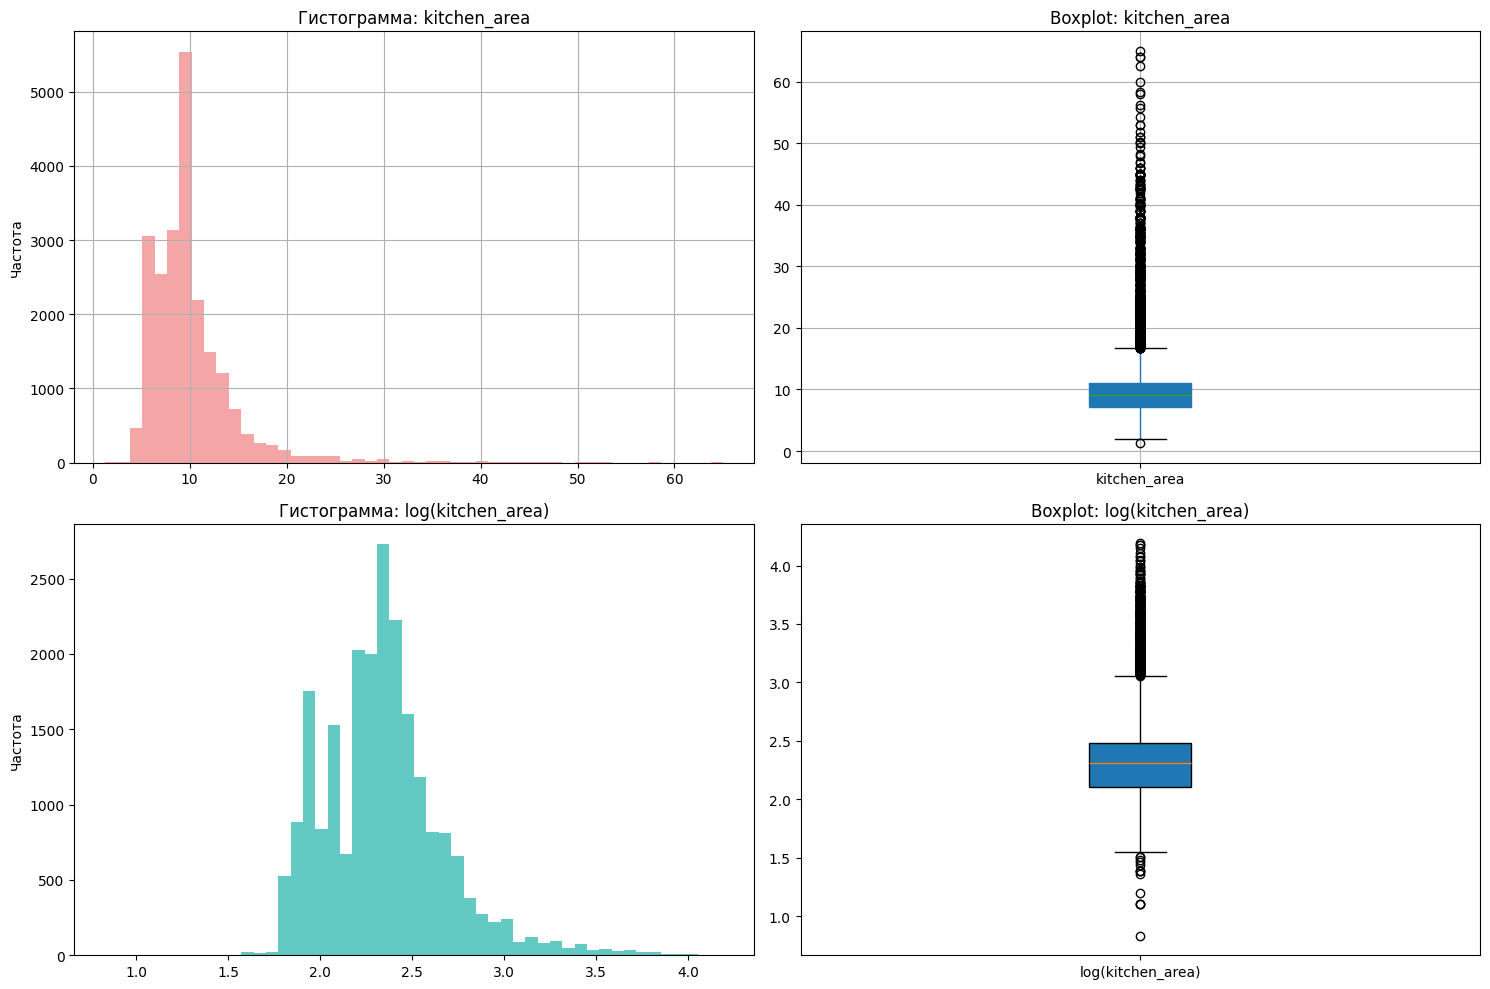

Оригинальные данные:
count    22121.000000
mean        10.075950
std          4.672697
min          1.300000
25%          7.200000
50%          9.100000
75%         11.000000
max         65.000000
Name: kitchen_area, dtype: float64

Асимметрия: 3.34

Логарифмированные данные:
Минимум: 0.83
Максимум: 4.19
Среднее: 2.34
Медиана: 2.31
Стандартное отклонение: 0.33
Асимметрия: 0.98


In [ ]:
# Рассмотрим kitchen_area
col = 'kitchen_area'

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Оригинальные данные

# Гистограмма
df[col].hist(bins=50, ax=ax1, alpha=0.7, color='lightcoral')
ax1.set_title(f'Гистограмма: {col}')
ax1.set_ylabel('Частота')

# Boxplot
df[[col]].boxplot(ax=ax2, patch_artist=True)
ax2.set_title(f'Boxplot: {col}')

# Логарифмированные данные
log_price = np.log1p(df[col])  # Временная переменная

# Гистограмма логарифмированных данных
ax3.hist(log_price, bins=50, alpha=0.7, color='lightseagreen')
ax3.set_title(f'Гистограмма: log({col})')
ax3.set_ylabel('Частота')

# Boxplot логарифмированных данных
ax4.boxplot(log_price, patch_artist=True)
ax4.set_title(f'Boxplot: log({col})')
ax4.set_xticklabels([f'log({col})'])  # Подписываем ось

plt.tight_layout()
plt.show()

# Статистика для сравнения
print("Оригинальные данные:")
print(df[col].describe())
print(f"\nАсимметрия: {df[col].skew():.2f}")

print("\nЛогарифмированные данные:")
print(f"Минимум: {log_price.min():.2f}")
print(f"Максимум: {log_price.max():.2f}")
print(f"Среднее: {log_price.mean():.2f}")
print(f"Медиана: {log_price.median():.2f}")
print(f"Стандартное отклонение: {log_price.std():.2f}")
print(f"Асимметрия: {log_price.skew():.2f}")

По гистограмме: kitchen_area можно увидеть, что есть выраженный "хвост" справа. Резкий пик в области 6-10 м², что является стандартными типовыми кухнями.
Если рассматривать гистограмму log(kitchen_area), то можно увидеть, что ассиметрия уменьшилась.


Если анализировать Boxplot: kitchen_area, то можно увидеть много выбросов, выходящих за пределы "усов".

In [ ]:
# Определим границы
lower_bound = df['kitchen_area'].quantile(0.01)   # 1-й перцентиль
upper_bound = df['kitchen_area'].quantile(0.99)   # 99-й перцентиль
# Находим выбросы
outliers = df[(df['kitchen_area'] < lower_bound) | (df['kitchen_area'] > upper_bound)]
print(f"Выбросов по перцентилям: {len(outliers)} ({len(outliers)/len(df):.2%})")

# Удаляем выбросы

df_clean = df[(df['kitchen_area'] >= lower_bound) & (df['kitchen_area'] <= upper_bound)]

Выбросов по перцентилям: 276 (1.25%)


Рассмотрим логические соответствия, то есть проверим, что kitchen_area не превышает total_area.

In [ ]:
# Находим записи, где площадь кухни больше общей площади
illogical_entries = df[df['kitchen_area'] > df['total_area']]

print(f"Найдено логических несоответствий: {len(illogical_entries)}")
print(f"Процент от общего числа: {len(illogical_entries)/len(df)*100:.2f}%")

if len(illogical_entries) > 0:
    print("\nПримеры несоответствий:")
    print(illogical_entries[['total_area', 'kitchen_area', 'rooms', 'price']].head())

Найдено логических несоответствий: 0
Процент от общего числа: 0.00%


Однако, логических несоответствий не найдено.

Также можно проверить то, что total_area+living_area>kitchen_area

In [ ]:
# Находим записи, где общая + жилая < кухни (что невозможно)
impossible_entries = df[df['total_area'] + df['living_area'] < df['kitchen_area']]

print(f"Найдено невозможных записей: {len(impossible_entries)}")
print(f"Процент от общего числа: {len(impossible_entries)/len(df)*100:.2f}%")

if len(impossible_entries) > 0:
    print("\nПримеры невозможных записей:")
    print(impossible_entries[['total_area', 'living_area', 'kitchen_area', 'rooms', 'price']].head())

Найдено невозможных записей: 0
Процент от общего числа: 0.00%


Также не найдено логических несоответствий.

РАСМОТРИМ ГЕОГРАФИЧЕСКИЕ ПРИЗНАКИ

Для начала рассмотрим расстояния до аэропорта.

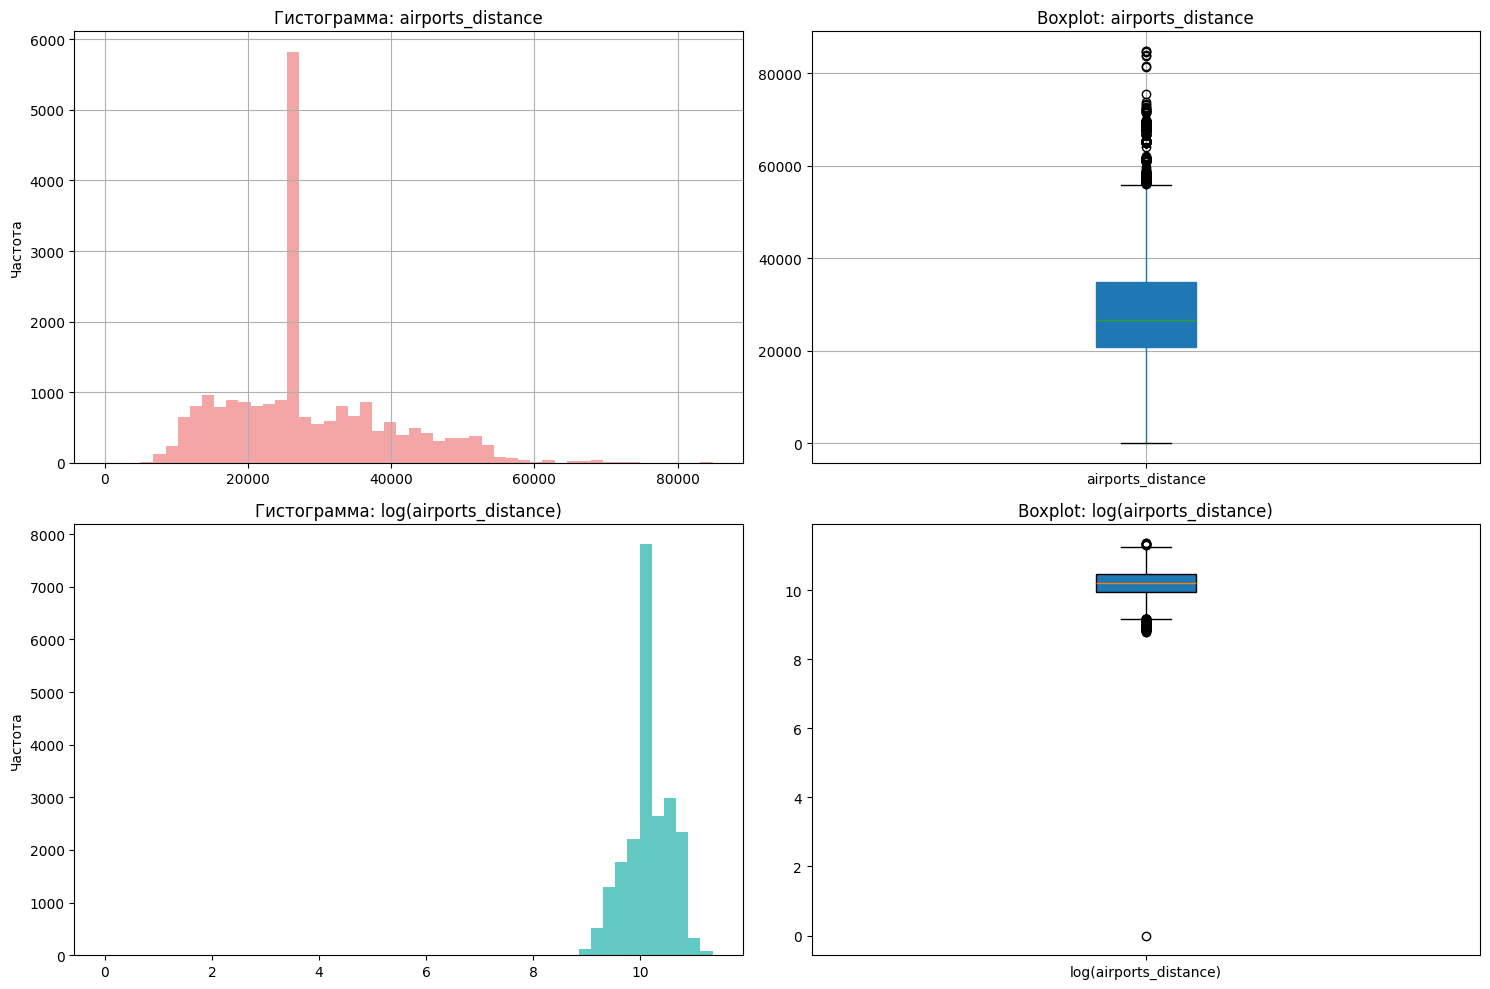

Оригинальные данные:
count    22121.000000
mean     28379.283079
std      11224.679958
min          0.000000
25%      20865.000000
50%      26726.000000
75%      34939.000000
max      84869.000000
Name: airports_distance, dtype: float64

Асимметрия: 0.71

Логарифмированные данные:
Минимум: 0.00
Максимум: 11.35
Среднее: 10.17
Медиана: 10.19
Стандартное отклонение: 0.42
Асимметрия: -1.02


In [ ]:
# Рассмотрим airports_distance
col = 'airports_distance'

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Оригинальные данные

# Гистограмма
df[col].hist(bins=50, ax=ax1, alpha=0.7, color='lightcoral')
ax1.set_title(f'Гистограмма: {col}')
ax1.set_ylabel('Частота')

# Boxplot
df[[col]].boxplot(ax=ax2, patch_artist=True)
ax2.set_title(f'Boxplot: {col}')

# Логарифмированные данные
log_price = np.log1p(df[col])  # Временная переменная

# Гистограмма логарифмированных данных
ax3.hist(log_price, bins=50, alpha=0.7, color='lightseagreen')
ax3.set_title(f'Гистограмма: log({col})')
ax3.set_ylabel('Частота')

# Boxplot логарифмированных данных
ax4.boxplot(log_price, patch_artist=True)
ax4.set_title(f'Boxplot: log({col})')
ax4.set_xticklabels([f'log({col})'])  # Подписываем ось

plt.tight_layout()
plt.show()

# Статистика для сравнения
print("Оригинальные данные:")
print(df[col].describe())
print(f"\nАсимметрия: {df[col].skew():.2f}")

print("\nЛогарифмированные данные:")
print(f"Минимум: {log_price.min():.2f}")
print(f"Максимум: {log_price.max():.2f}")
print(f"Среднее: {log_price.mean():.2f}")
print(f"Медиана: {log_price.median():.2f}")
print(f"Стандартное отклонение: {log_price.std():.2f}")
print(f"Асимметрия: {log_price.skew():.2f}")



В данных представлены квартиры как вблизи аэропорта, так и на значительном удалении. Это говорит о хорошем географическом разнообразии выборки. Для большинства квартир расстояние до аэропорта, вероятно, не является критическим фактором. Значимое влияние может наблюдаться только на крайних значениях.

Для начала можно рассмотреть гистограмму: airports_distance. В данном случае основной диапазон примерно от 10 до 60 км. Минимум выбросов.


Если же рассматривать Boxplot: airports_distance, то можно увидеть, что выбросы минимальны и, вероятно, представляют реальные объекты.


В данном случае не удаляем выбросы по методу перцентилей, так как удаление выбросов приведет к большой доле удаленных записей и существование больших расстояний до аэропорта возможно.

Можно рассмотреть явные ошибки, то есть расстояние до аэропорта равно нулю, что невозможно, только если квартира не находится в самом аэропорту.

In [ ]:
# Расстояние до аэропорта равно 0:
df[df['airports_distance'] == 0]

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
21085,7000000.0,34.7,1,2.7,9.0,19.8,3,False,6.0,2.0,0.0,22801.0,967.0,977.0


In [ ]:
# Запоминаем размер до удаления
before_size = len(df)

# Удаляем записи где airports_distance == 0
df = df[df['airports_distance'] != 0]

# Статистика
removed_count = before_size - len(df)
print(f"Удалено записей с расстоянием 0: {removed_count}")
print(f"Осталось записей: {len(df)}")

Удалено записей с расстоянием 0: 1
Осталось записей: 22120


Рассмотрим расстояние до центра

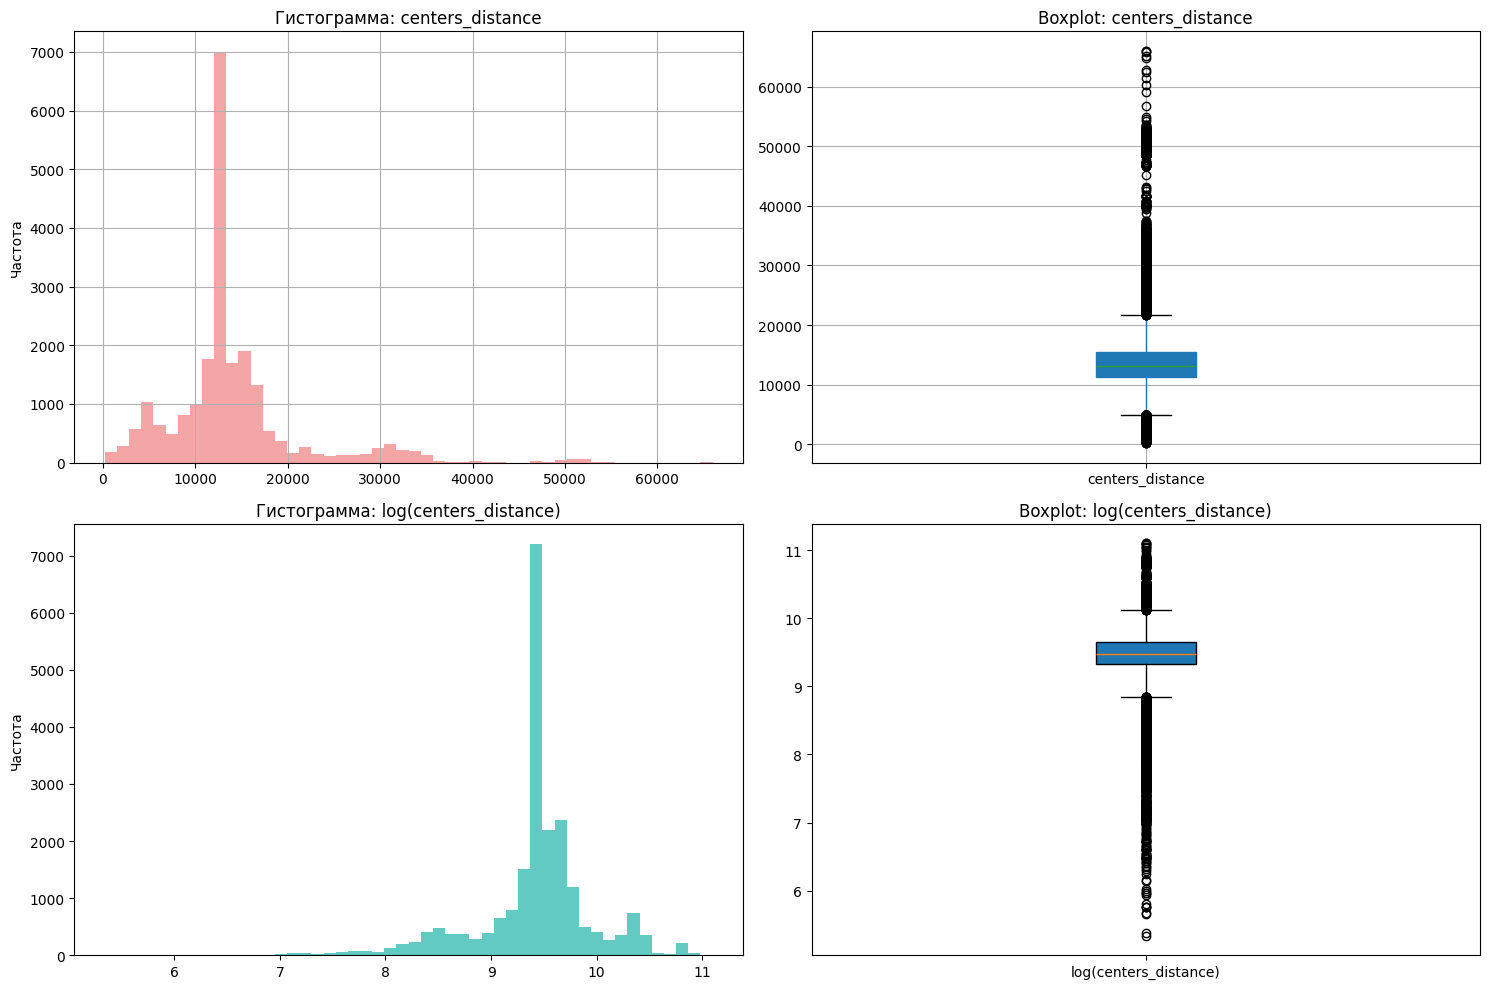

Оригинальные данные:
count    22120.000000
mean     14153.910443
std       7538.854534
min        208.000000
25%      11204.000000
50%      13098.500000
75%      15419.000000
max      65968.000000
Name: centers_distance, dtype: float64

Асимметрия: 2.05

Логарифмированные данные:
Минимум: 5.34
Максимум: 11.10
Среднее: 9.42
Медиана: 9.48
Стандартное отклонение: 0.56
Асимметрия: -1.21


In [ ]:
# Рассмотрим centers_distance
col = 'centers_distance'

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Оригинальные данные

# Гистограмма
df[col].hist(bins=50, ax=ax1, alpha=0.7, color='lightcoral')
ax1.set_title(f'Гистограмма: {col}')
ax1.set_ylabel('Частота')

# Boxplot
df[[col]].boxplot(ax=ax2, patch_artist=True)
ax2.set_title(f'Boxplot: {col}')

# Логарифмированные данные
log_price = np.log1p(df[col])  # Временная переменная

# Гистограмма логарифмированных данных
ax3.hist(log_price, bins=50, alpha=0.7, color='lightseagreen')
ax3.set_title(f'Гистограмма: log({col})')
ax3.set_ylabel('Частота')

# Boxplot логарифмированных данных
ax4.boxplot(log_price, patch_artist=True)
ax4.set_title(f'Boxplot: log({col})')
ax4.set_xticklabels([f'log({col})'])  # Подписываем ось

plt.tight_layout()
plt.show()

# Статистика для сравнения
print("Оригинальные данные:")
print(df[col].describe())
print(f"\nАсимметрия: {df[col].skew():.2f}")

print("\nЛогарифмированные данные:")
print(f"Минимум: {log_price.min():.2f}")
print(f"Максимум: {log_price.max():.2f}")
print(f"Среднее: {log_price.mean():.2f}")
print(f"Медиана: {log_price.median():.2f}")
print(f"Стандартное отклонение: {log_price.std():.2f}")
print(f"Асимметрия: {log_price.skew():.2f}")

Проанализируем гистограммы. Если рассматривать не логарифмированную гистограмму, то можно сделать вывод, что у нее есть сильная правосторонная симметрия, то есть длинный "хвост" вправо. Также можно увидеть, что частота быстро убывает с ростом расстояния, что характеризуется типичным распределением для городской недвижимости - плотность застройки уменьшается от центра.  

По Boxplot: centers_distance можно увидеть, что существует много выбросов и наличие объектов на большом удалении создает "хвост".

В расстоянии до центра ничего не меняем и не удаляем, так как квартира может находиться в центре в 0 км от него, так и в пригороде за 60 км. Поэтому, было принято решение не удалять выбросы и не поднимать долю удаленных записей в таблице.

Рассмотрим расстояние до парков

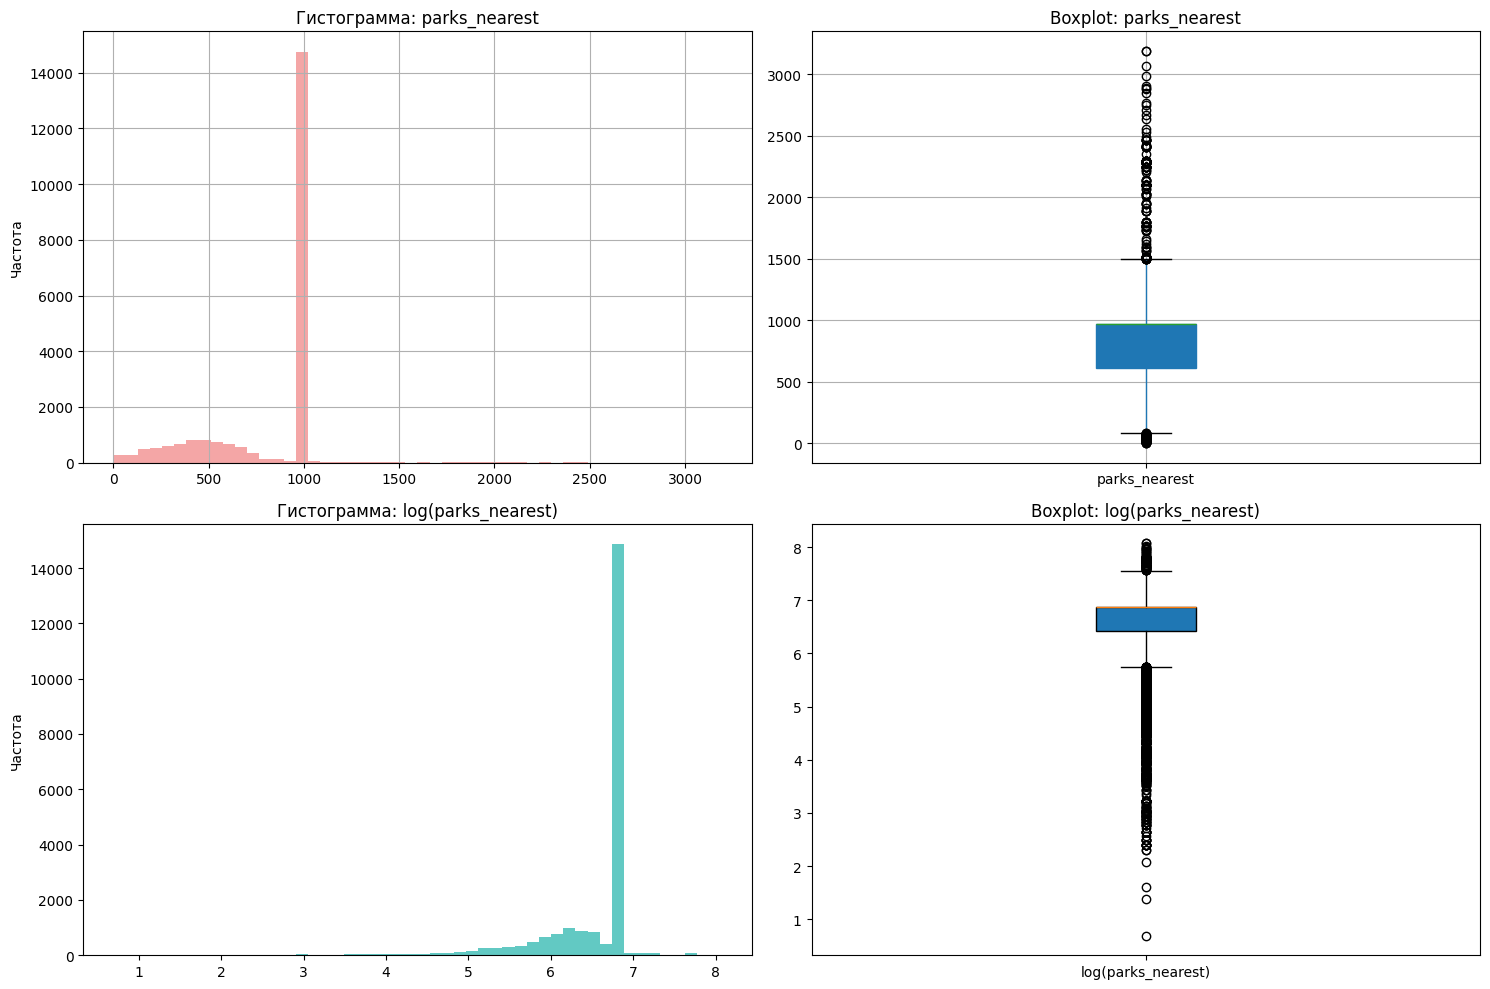

Оригинальные данные:
count    22120.000000
mean       808.598960
std        298.569544
min          1.000000
25%        613.000000
50%        967.000000
75%        967.000000
max       3190.000000
Name: parks_nearest, dtype: float64

Асимметрия: -0.32

Логарифмированные данные:
Минимум: 0.69
Максимум: 8.07
Среднее: 6.57
Медиана: 6.88
Стандартное отклонение: 0.61
Асимметрия: -2.63


In [ ]:
# Рассмотрим parks_nearest
col = 'parks_nearest'

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Оригинальные данные

# Гистограмма
df[col].hist(bins=50, ax=ax1, alpha=0.7, color='lightcoral')
ax1.set_title(f'Гистограмма: {col}')
ax1.set_ylabel('Частота')

# Boxplot
df[[col]].boxplot(ax=ax2, patch_artist=True)
ax2.set_title(f'Boxplot: {col}')

# Логарифмированные данные
log_price = np.log1p(df[col])  # Временная переменная

# Гистограмма логарифмированных данных
ax3.hist(log_price, bins=50, alpha=0.7, color='lightseagreen')
ax3.set_title(f'Гистограмма: log({col})')
ax3.set_ylabel('Частота')

# Boxplot логарифмированных данных
ax4.boxplot(log_price, patch_artist=True)
ax4.set_title(f'Boxplot: log({col})')
ax4.set_xticklabels([f'log({col})'])  # Подписываем ось

plt.tight_layout()
plt.show()

# Статистика для сравнения
print("Оригинальные данные:")
print(df[col].describe())
print(f"\nАсимметрия: {df[col].skew():.2f}")

print("\nЛогарифмированные данные:")
print(f"Минимум: {log_price.min():.2f}")
print(f"Максимум: {log_price.max():.2f}")
print(f"Среднее: {log_price.mean():.2f}")
print(f"Медиана: {log_price.median():.2f}")
print(f"Стандартное отклонение: {log_price.std():.2f}")
print(f"Асимметрия: {log_price.skew():.2f}")

Как можно увидеть по гистограмме с нелогарифмированными значениями, то наблюдается экстремальная правосторонняя асимметрия, которая возникла по причине того, что в прошлом пункте при работе с пропусками были заменены на большие расстояния.

Если же рассматривать Boxplot: parks_nearest, то можно сделать вывод, что ящик не видно из-за масштабов и существует огромное количества выбросов, которые мы сами создали.

Рассмотрим есть ли в данных расстояние равное 0.

In [ ]:
# Подсчет количества записей с нулевым расстоянием до парка
zero_distance_count = (df['parks_nearest'] == 0).sum()
# Рассчитаем долю нулевых расстояний в процентах от общего числа наблюдений
zero_percentage = zero_distance_count / len(df) * 100
print(f"Объектов с нулевым расстоянием до парка: {zero_distance_count} ({zero_percentage:.1f}%)")

Объектов с нулевым расстоянием до парка: 0 (0.0%)


В данных нет парков на расстоянии 0 км. Не удаляем выбросы, так как они были созданы вручную в прошлом пункте и это возможно в рамках расстояний до объектов

Далее рассмотрим расстояние до водоемов

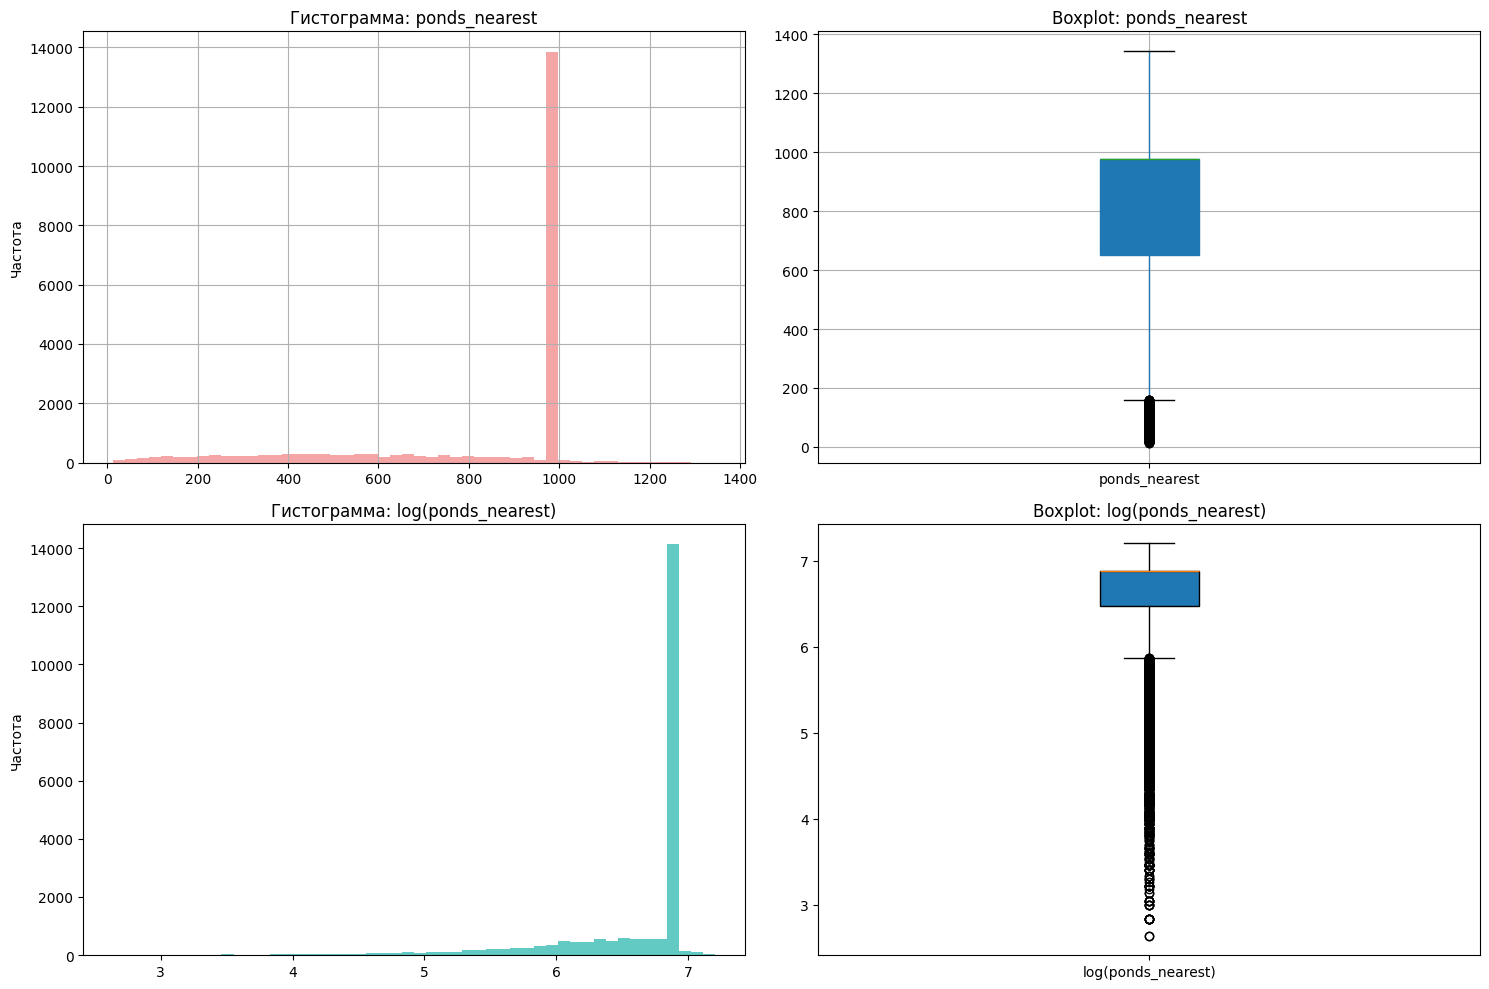

Оригинальные данные:
count    22120.000000
mean       805.391637
std        278.230378
min         13.000000
25%        650.000000
50%        977.000000
75%        977.000000
max       1344.000000
Name: ponds_nearest, dtype: float64

Асимметрия: -1.31

Логарифмированные данные:
Минимум: 2.64
Максимум: 7.20
Среднее: 6.57
Медиана: 6.89
Стандартное отклонение: 0.60
Асимметрия: -2.44


In [ ]:
# Рассмотрим ponds_nearest
col = 'ponds_nearest'

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Оригинальные данные

# Гистограмма
df[col].hist(bins=50, ax=ax1, alpha=0.7, color='lightcoral')
ax1.set_title(f'Гистограмма: {col}')
ax1.set_ylabel('Частота')

# Boxplot
df[[col]].boxplot(ax=ax2, patch_artist=True)
ax2.set_title(f'Boxplot: {col}')

# Логарифмированные данные
log_price = np.log1p(df[col])  # Временная переменная

# Гистограмма логарифмированных данных
ax3.hist(log_price, bins=50, alpha=0.7, color='lightseagreen')
ax3.set_title(f'Гистограмма: log({col})')
ax3.set_ylabel('Частота')

# Boxplot логарифмированных данных
ax4.boxplot(log_price, patch_artist=True)
ax4.set_title(f'Boxplot: log({col})')
ax4.set_xticklabels([f'log({col})'])  # Подписываем ось

plt.tight_layout()
plt.show()

# Статистика для сравнения
print("Оригинальные данные:")
print(df[col].describe())
print(f"\nАсимметрия: {df[col].skew():.2f}")

print("\nЛогарифмированные данные:")
print(f"Минимум: {log_price.min():.2f}")
print(f"Максимум: {log_price.max():.2f}")
print(f"Среднее: {log_price.mean():.2f}")
print(f"Медиана: {log_price.median():.2f}")
print(f"Стандартное отклонение: {log_price.std():.2f}")
print(f"Асимметрия: {log_price.skew():.2f}")

Как и в случае с парками есть правосторонняя асимметрия и длинный "хвост" справа из-за того, что в прошлом пункте пропущенные значения были заменены на максимальное расстояние, что возможно, поэтому удалять выбросы в данном случае также не будем.

Рассмотрим только случай того, что расстояние до водоемов может быть равно 0.

In [ ]:
# Подсчет количества записей с нулевым расстоянием до водоемов
zero_distance_count = (df['ponds_nearest'] == 0).sum()
# Рассчитаем долю нулевых расстояний в процентах от общего числа наблюдений
zero_percentage = zero_distance_count / len(df) * 100
print(f"Объектов с нулевым расстоянием до парка: {zero_distance_count} ({zero_percentage:.1f}%)")

Объектов с нулевым расстоянием до парка: 0 (0.0%)


Таким образом, в данных нет квартир с расстоянием до водоемов в 0 км.

Рассмотрим категориальные признаки

Для начала рассмотрим распределение комнат

In [ ]:
print("Распределение комнат:")
print(df['rooms'].value_counts().sort_index())

print(f"\nВсего уникальных значений: {len(df['rooms'].unique())}")
print(f"Минимум: {df['rooms'].min()}, Максимум: {df['rooms'].max()}")

Распределение комнат:
rooms
0     107
1    7501
2    7738
3    5621
4     997
5     136
6      14
7       6
Name: count, dtype: int64

Всего уникальных значений: 8
Минимум: 0, Максимум: 7


Таким образом, в рамках количества комнат возможно существование как студии - 0, так и квартир с 7 комнатами.

Рассмотрим распределение количества этажей в домах, где расположены квартиры.

In [ ]:
print("Распределение количества этажей:")
print(df['floors_total'].value_counts().sort_index())

print(f"\nВсего уникальных значений: {len(df['floors_total'].unique())}")
print(f"Минимум: {df['floors_total'].min()}, Максимум: {df['floors_total'].max()}")

Распределение количества этажей:
floors_total
1.0       17
2.0      304
3.0      593
4.0     1098
5.0     5384
6.0      772
7.0      518
8.0      327
9.0     3676
10.0    1134
11.0     189
12.0    1310
13.0     215
14.0     529
15.0     351
16.0    1311
17.0     802
18.0     470
19.0     305
20.0     257
21.0     150
22.0     270
23.0     338
24.0     441
25.0    1038
26.0     120
27.0     152
28.0      21
29.0       1
33.0       1
34.0       1
35.0      22
36.0       2
60.0       1
Name: count, dtype: int64

Всего уникальных значений: 34
Минимум: 1.0, Максимум: 60.0


В Санкт-Петербурге нет жилых домов или офисных зданий высотой 60 этажей. Самым высоким зданием в городе является «Лахта Центр» с 87 этажами, но это общественно-деловой центр, а не жилой дом. Самый высокий жилой дом в Санкт-Петербурге — «Князь Александр Невский», в котором 37 этажей.

In [ ]:
# Запоминаем исходный размер
before_size = len(df)

# Удаляем квартиры в домах с 60 этажами
df = df[~df['floors_total'].isin([60])]

# Статистика удаления
removed_count = before_size - len(df)
print(f"Удалено квартир в домах с 60 этажами: {removed_count}")
print(f"Осталось записей: {len(df)}")
print(f"Доля удаленных: {(removed_count/before_size)*100:.2f}%")

# Проверяем обновленное распределение
print("\nОбновленное распределение этажности:")
print(df['floors_total'].value_counts().sort_index())

Удалено квартир в домах с 60 этажами: 1
Осталось записей: 22119
Доля удаленных: 0.00%

Обновленное распределение этажности:
floors_total
1.0       17
2.0      304
3.0      593
4.0     1098
5.0     5384
6.0      772
7.0      518
8.0      327
9.0     3676
10.0    1134
11.0     189
12.0    1310
13.0     215
14.0     529
15.0     351
16.0    1311
17.0     802
18.0     470
19.0     305
20.0     257
21.0     150
22.0     270
23.0     338
24.0     441
25.0    1038
26.0     120
27.0     152
28.0      21
29.0       1
33.0       1
34.0       1
35.0      22
36.0       2
Name: count, dtype: int64


Рассмотрим этажность наших квартир в данных.

In [ ]:
print("Распределение этажей:")
print(df['floor'].value_counts().sort_index())

print(f"\nВсего уникальных значений: {len(df['floor'].unique())}")
print(f"Минимум: {df['floor'].min()}, Максимум: {df['floor'].max()}")

Распределение этажей:
floor
1     2710
2     3131
3     2867
4     2585
5     2441
6     1219
7     1142
8     1027
9     1006
10     652
11     490
12     498
13     353
14     319
15     323
16     297
17     207
18     161
19     137
20     104
21     113
22     107
23      95
24      55
25      43
26      22
27       9
28       1
29       1
30       1
31       1
32       1
33       1
Name: count, dtype: int64

Всего уникальных значений: 33
Минимум: 1, Максимум: 33


В данном случае возможно существование квартир на 33 этаже, так как в г. Санкт-Петербург самы большой жилой дом достигает 37 этажей.

In [ ]:
len(df)

22119

Исходное количество данных: 23 699

Конечное количество данных: 22 119

Итог:
1) Потеряно записей: 1 580

2) Процент потерь: 6.67%

3) Сохранено данных: 93.33%

*   Закодировать категориальные признаки

Закодируем True - 1, False - 0, как наличие студии или ее отсутствие.

In [ ]:
# Просто преобразуем в 0 и 1
df['studio'] = df['studio'].astype(int)

# Проверим результат
print(df[['studio']].head())
print(f"\nУникальные значения: {df['studio'].unique()}")

   studio
0       0
1       0
2       0
4       0
5       0

Уникальные значения: [0 1]


Закодируем признак (balcony) как 0 - нет балкона, 1 - в квартире есть балкон.

In [ ]:
# Посмотрим на уникальные значения и их частотность
print("Уникальные значения balcony:")
print(df['balcony'].value_counts(dropna=False))

Уникальные значения balcony:
balcony
Unknown    10683
1.0         3949
2.0         3493
0.0         3462
5.0          290
4.0          169
3.0           73
Name: count, dtype: int64


In [ ]:
# Закодируем Unknown и 0.0 как "нет балкона" (0), все остальное как "есть балкон" (1)
df['balcony'] = df['balcony'].apply(lambda x: 0 if x == 'Unknown' or x == 0.0 else 1)

# Альтернативный вариант
df['balcony'] = np.where(df['balcony'].isin(['Unknown', 0.0]), 0, 1)

Рассмотрим категориальный признак: комнаты

In [ ]:
print("Распределение комнат:")
print(df['rooms'].value_counts().sort_index())

Распределение комнат:
rooms
0     107
1    7501
2    7737
3    5621
4     997
5     136
6      14
7       6
Name: count, dtype: int64


Данную переменную оставим без изменений

Рассмотрим переменную количества этажей в доме.

In [ ]:
print("Распределение количества этажей:")
print(df['floors_total'].value_counts().sort_index())

Распределение количества этажей:
floors_total
1.0       17
2.0      304
3.0      593
4.0     1098
5.0     5384
6.0      772
7.0      518
8.0      327
9.0     3676
10.0    1134
11.0     189
12.0    1310
13.0     215
14.0     529
15.0     351
16.0    1311
17.0     802
18.0     470
19.0     305
20.0     257
21.0     150
22.0     270
23.0     338
24.0     441
25.0    1038
26.0     120
27.0     152
28.0      21
29.0       1
33.0       1
34.0       1
35.0      22
36.0       2
Name: count, dtype: int64


Также оставим данную переменную без изменений.

Рассмотрим переменную, означающую этажность квартиры и также оставим ее без изменений.

In [ ]:
print("Распределение этажей:")
print(df['floor'].value_counts().sort_index())

Распределение этажей:
floor
1     2710
2     3131
3     2867
4     2585
5     2441
6     1219
7     1142
8     1027
9     1006
10     652
11     490
12     498
13     353
14     319
15     323
16     297
17     207
18     161
19     137
20     104
21     113
22     107
23      95
24      55
25      43
26      22
27       9
28       1
29       1
30       1
31       1
32       1
33       1
Name: count, dtype: int64


*   Скалировать / Нормализовать данные

In [ ]:
numeric_columns = ['price', 'total_area', 'living_area', 'parks_nearest', 'ceiling_height', 'ponds_nearest', 'centers_distance', 'airports_distance', 'kitchen_area']

In [ ]:
# Логарифмируем
df_log = np.log1p(df[numeric_columns]) # временная таблица

# Скалируем
df[numeric_columns] = StandardScaler().fit_transform(df_log) # перезаписываем оригинальные данные

### **2. Добавить новые признаки, обосновать выбор.**

Данный показатель показывает стоимость недвижимости и позволяет сравнивать квартиры разной площади, также является основным фактором в оценке рыночной стоимости.

In [ ]:
df['price_per_sqm'] = df['price'] / df['total_area']  # Цена за кв.м.

Доля жилой площади показывает эффективность планировки, если значение высокое, то больше полезной площади

In [ ]:
df['living_ratio'] = df['living_area'] / df['total_area']  # Доля жилой площади

Доля кухни позволяет оценить сегмент жилья, так как большая кухня указывает на премиум-сегмент, а маленькая кухня может указывать на студию.

In [ ]:
df['kitchen_ratio'] = df['kitchen_area'] / df['total_area']  # Доля кухни

Также можно рассмотреть показатель близости к центру. Данный показатель является обратным расстоянием. Близость к центру будет указывать на высокую стоимость.

In [ ]:
df['city_center_proximity'] = 1 / (df['centers_distance'] + 1)  # Близость к центру

### **3. Оценить влияние признаков на стоимость квартиры или кв.м. Отобрать значимые признаки, обосновать выбор.**

Для анализа влияния признаков на стоимость квартиры будем использовать:
1) Анализ корреляций
2) Построение регрессионной модели и анализ важности признаков с помощью статистических методов


In [ ]:
# Анализ корреляции с ценой
correlation_with_price = df.corr()['price'].sort_values(ascending=False)
print("Корреляция с ценой:")
print(correlation_with_price)

Корреляция с ценой:
price                    1.000000
total_area               0.727004
living_area              0.561650
kitchen_area             0.555190
rooms                    0.467493
ceiling_height           0.404413
floors_total             0.186188
floor                    0.139593
price_per_sqm            0.007779
kitchen_ratio            0.001982
living_ratio            -0.000699
balcony                 -0.006542
airports_distance       -0.015108
city_center_proximity   -0.033931
studio                  -0.049148
parks_nearest           -0.210188
ponds_nearest           -0.247346
centers_distance        -0.387151
Name: price, dtype: float64


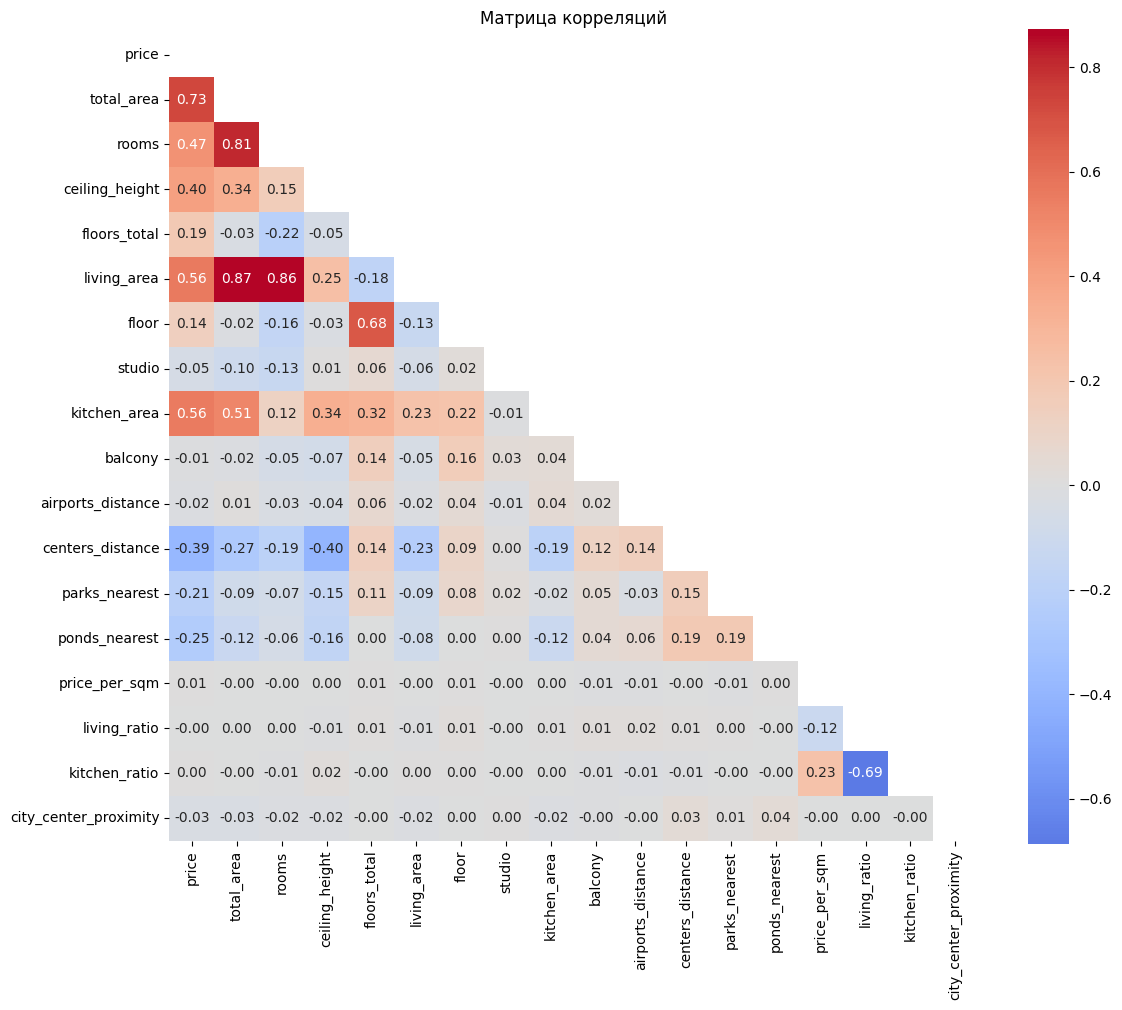

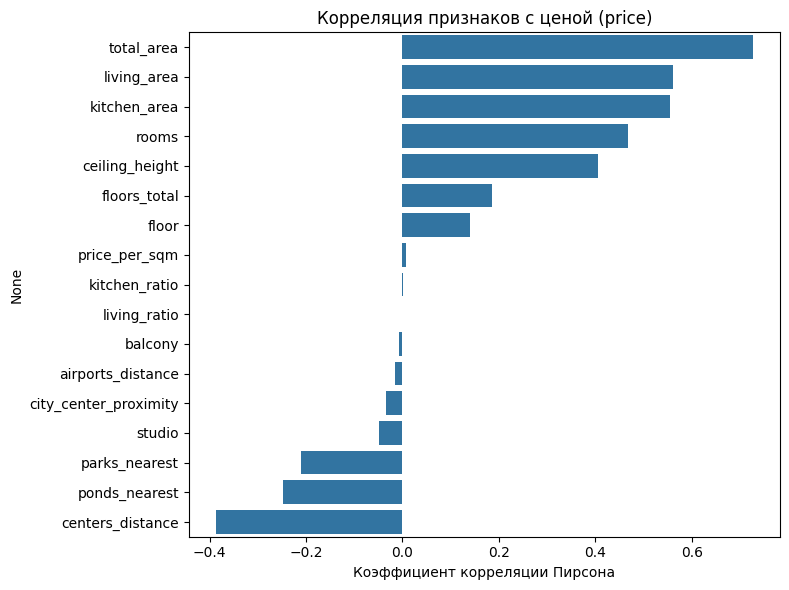

In [ ]:
# Создаем тепловую карту корреляций
plt.figure(figsize=(12, 10))

# Маска для верхнего треугольника
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Тепловая карта
sns.heatmap(df.corr(),
            mask=mask,
            annot=True, # Показать числа в ячейках
            fmt='.2f', # Формат чисел: 2 знака после запятой
            cmap='coolwarm', # Цветовая схема
            center=0, # Центр цветовой шкалы на 0
            square=True)
plt.title('Матрица корреляций')
plt.tight_layout()
plt.show()

# Отдельно посмотрим корреляцию с целевой переменной
plt.figure(figsize=(8, 6))
price_corr = df.corr()['price'].sort_values(ascending=False)
price_corr.drop('price', inplace=True) # Убираем саму с собой

sns.barplot(x=price_corr.values, y=price_corr.index)
plt.title('Корреляция признаков с ценой (price)')
plt.xlabel('Коэффициент корреляции Пирсона')
plt.tight_layout()
plt.show()

На основе матрицы корреляции с ценой можно сделать следующие выводы:

Сильная корреляции с ценой наблюдается с total_area, который является самым сильным фактором. living_area и kitchen_area - также сильно влияет на цену. rooms - количество комнат важный признак, но менее значителен, чем площадь.

Умеренное влияние наблюдается для ceiling_height - высота потолков. floors_total - этажность дома имеет слабое положительное влияние.

Сильное негативное влияние наблюдается для centers_distance, который является самым значимым территориальным фактором. Однако, близость к водоемам (ponds_nearest) и паркам (parks_nearest) неожиданно снижают стоимость.

Незначимыми факторами являются пропорции помещений (kitchen_ratio, living_ratio).

In [ ]:
# Рассмотрим мультиколлинеарность в данных
# Признаки для анализа
features = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height',
           'centers_distance', 'parks_nearest', 'floor']

# Берем только существующие признаки
existing_features = [f for f in features if f in df.columns]

# Подготовка данных
X = df[existing_features]

# Расчет VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF показатели:")
print(vif_data.sort_values('VIF', ascending=False))

VIF показатели:
            feature       VIF
0        total_area  7.466833
1       living_area  5.910630
3             rooms  2.768997
7             floor  2.476561
2      kitchen_area  2.083982
4    ceiling_height  1.345378
5  centers_distance  1.245181
6     parks_nearest  1.039522


Таким образом, VIF < 10 для рассматриваемых признаков и никакие из признаков не удаляем.



Построим регрессионную модель и рассмотрим значимость признаков  

In [ ]:
import statsmodels.api as sm

X = df.drop('price', axis=1)
y = df['price']

# Добавляем константу
X = sm.add_constant(X)

# Линейная регрессия
model = sm.OLS(y, X)
results = model.fit()

# Результаты
print(results.summary())

# Таблица с p-values
p_values = results.pvalues
coefficients = results.params

results_df = pd.DataFrame({
    'coefficient': coefficients,
    'p_value': p_values
})

print("\nP-values для отбора признаков:")
print(results_df[results_df.index != 'const'].sort_values('p_value'))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     2723.
Date:                Mon, 06 Oct 2025   Prob (F-statistic):               0.00
Time:                        01:39:28   Log-Likelihood:                -18891.
No. Observations:               22119   AIC:                         3.782e+04
Df Residuals:                   22101   BIC:                         3.796e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.02

Таким образом, в данном случае проверяется гипотеза:

H₀: коэффициент при признаке равен нулю (данный признак не оказывает статистически значимого влияния на цену квартиры)

H₁: коэффициент при признаке не равен нулю (данный признак оказывает статистически значимое влияние на цену квартиры)

Если p_value < 0.05, то тогда гипотеза H₀ отвергается в пользу H₁.

Если p_value ≥ 0.05, то тогда нет оснований отвергнуть H₀.

Таким образом, отвергаем гипотезу H₀ для следующих признаков:
1) total_area
2) centers_distance
3) floors_total
4) ponds_nearest
5) parks_nearest
6) ceiling_height
7) rooms
8) kitchen_area
9) floor
10) airports_distance


Принимается гипотеза H₀ о незначимости для следующих признаков:

1) living_area

2) price_per_sqm

3) studio

4) balcony

5) kitchen_ratio

6) city_center_proximity

7) living_ratio


In [ ]:
# Удаляем незначимые признаки
# Список незначимых признаков на основе p-value анализа
features_to_drop = [
    'living_area',
    'price_per_sqm',
    'studio',
    'balcony',
    'kitchen_ratio',
    'city_center_proximity',
    'living_ratio'
]

# Удаляем незначимые признаки
df_new = df.drop(columns=features_to_drop)

print(f"Было колонок: {df.shape[1]}")
print(f"Стало колонок: {df_new.shape[1]}")
print(f"Удалено признаков: {len(features_to_drop)}")

Было колонок: 18
Стало колонок: 11
Удалено признаков: 7


### **4. Попробовать выделить различные группы, внутри которых влияние характеристик на цену различаются между группами.**

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22119 entries, 0 to 23697
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              22119 non-null  float64
 1   total_area         22119 non-null  float64
 2   rooms              22119 non-null  int64  
 3   ceiling_height     22119 non-null  float64
 4   floors_total       22119 non-null  float64
 5   floor              22119 non-null  int64  
 6   kitchen_area       22119 non-null  float64
 7   airports_distance  22119 non-null  float64
 8   centers_distance   22119 non-null  float64
 9   parks_nearest      22119 non-null  float64
 10  ponds_nearest      22119 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 2.0 MB


Для выделения групп используем кластеризацию

In [ ]:
from sklearn.cluster import KMeans
# Признаки для кластеризации
features_for_clustering = [
    'total_area', 'rooms', 'ceiling_height', 'floors_total',
    'floor', 'kitchen_area', 'airports_distance', 'centers_distance',
    'parks_nearest', 'ponds_nearest'
]

print(f"Признаки: {len(features_for_clustering)}")
print(f"Данные: {df[features_for_clustering].shape}")

# Используем уже скалированные данные
X = df[features_for_clustering]

Признаки: 10
Данные: (22119, 10)


Используем метод локтя для определения оптимального количества кластера.

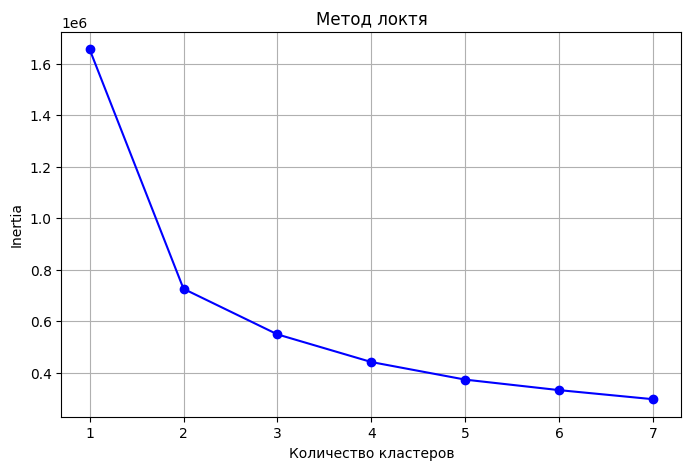

In [ ]:
# Метод локтя
inertia = []
k_range = range(1, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
# График метода локтя
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя')
plt.grid(True)
plt.show()

Переходим к кластеризации

In [ ]:
# Для разбиения используем 3 кластера. Данное количество кластеров будет наиболее оптимальным.
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

print("Распределение по кластерам:")
print(df['cluster'].value_counts().sort_index())

Распределение по кластерам:
cluster
0     5343
1    14127
2     2649
Name: count, dtype: int64


Как можно увидеть, доминирующим кластеров оказывается 1. А наименьшим 2.
Таким образом, можно сделать вывод, что:
Кластер 1 - основная, наиболее представительная группа, более общая.

Кластер 0 - средняя группа, где возможно, "премиум" или "улучшенные" объекты.

Кластеры 2 - наименьшая группа, возможно, "элитные" или "специфические" объекты.

Проанализируем характеристики кластеров

Средние значения по кластерам:
         total_area  rooms  ceiling_height  floors_total  floor  kitchen_area  \
cluster                                                                         
0              0.00   1.80           -0.03         16.30   6.88          0.37   
1              0.01   2.16            0.01          6.57   3.63         -0.24   
2             -0.08   1.68            0.02         22.11  16.05          0.51   

         airports_distance  centers_distance  parks_nearest  ponds_nearest  \
cluster                                                                      
0                     0.08              0.09           0.05          -0.01   
1                    -0.05             -0.08          -0.06          -0.00   
2                     0.09              0.23           0.23           0.02   

         price  
cluster         
0         0.24  
1        -0.13  
2         0.22  


<Figure size 1000x600 with 0 Axes>

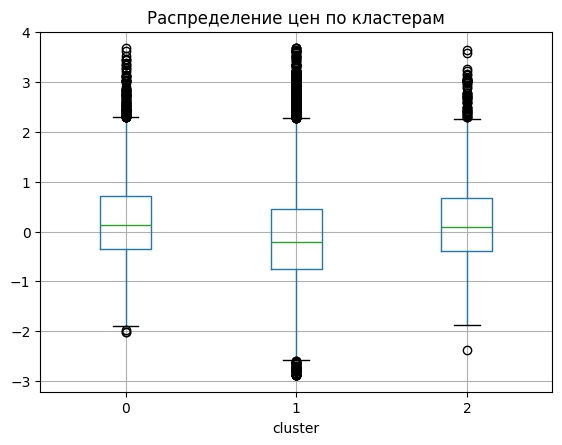

In [ ]:
# Средние значения по кластерам
cluster_means = df.groupby('cluster')[features_for_clustering + ['price']].mean()

print("Средние значения по кластерам:")
print(cluster_means.round(2))

# Визуализация цен по кластерам
plt.figure(figsize=(10, 6))
df.boxplot(column='price', by='cluster')
plt.title('Распределение цен по кластерам')
plt.suptitle('')
plt.show()

Если рассматривать первый кластер, то можно сделать вывод, что это "бюджетный сегмент", в котором наблюдается низкая цена, то есть самый дешевый сегмент (-0.13). Также средние параметры комнатности (2.16) и низкая этажность домов (6.57) и квартир (3.63). Также данные квартиры ближе к центрам (-0.08) и аэропортам (-0.05) и паркам (-0.06).

Кластер 0 - "премиум сегмент", который характеризуется самыми высокими ценами и дорогим сегментом (0.24). Также данные квартиры обладают высокой этажностью (6.88) в высоких домах (16). Также характеризается просторными кухнями (0.37) и близостью к паркам (0.05).

Кластер 2 - "элитный сегмент", который характеризуется также очень высокой ценой (0.22) и этажностью (16.05) в небоскребах (22 этажа), также самыми просторными кухнями (0.51), высокими потолками (0.02) и близостью к паркам (0.23)

Таким образом, можно сделать вывод, что ключевыми двайверами цен являются высокая этажность дома, высокий этаж расположения квартиры, близостью к паркам, а также размеры кухни.

### **5. Построить и обучить модель, которая по заданным признакам квартиры будет предсказывать ее цену/предсказывает цену за квадратный метр/ценовую категорию квартиры (дешевые, дорогие, средние)**

Построим модель линейной регрессии

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Для начала разделим признаки на целевую и объясняющие
features = [
    'total_area', 'rooms', 'ceiling_height', 'floors_total',
    'floor', 'kitchen_area', 'airports_distance', 'centers_distance',
    'parks_nearest', 'ponds_nearest'
]

target = 'price'

# Разделение на признаки и целевую переменную
X = df[features]
y = df[target]

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Модель 1: Линейная регрессия
print("ЛИНЕЙНАЯ РЕГРЕССИЯ")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Предсказания
y_pred_lr = lr_model.predict(X_test)

# Метрики для линейной регрессии
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"R²: {r2_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")
print(f"RMSE: {np.sqrt(mse_lr):.4f}")

ЛИНЕЙНАЯ РЕГРЕССИЯ
R²: 0.6751
MAE: 0.4317
RMSE: 0.5636


Модель линейной регрессии объясняет 67.5% дисперсии целевой переменной. Средняя ошибка предсказания составляет 43% от стандартного отклонения цены.

In [ ]:
# Коэффициенты линейной регрессии
print("\nВажность признаков (Linear Regression):")
feature_importance_lr = pd.DataFrame({
    'feature': features,
    'coefficient': lr_model.coef_
}).sort_values('coefficient', key=abs, ascending=False)
print(feature_importance_lr)


Важность признаков (Linear Regression):
             feature  coefficient
0         total_area     0.732479
7   centers_distance    -0.168565
1              rooms    -0.161540
8      parks_nearest    -0.127021
9      ponds_nearest    -0.090914
5       kitchen_area     0.068309
2     ceiling_height     0.066941
3       floors_total     0.027978
6  airports_distance    -0.014762
4              floor     0.004565


Таким образом, положительно влияют total_area, то есть увеличение площади на 1 м² приводит к росту цены на 0.73 ед. Отрицательно влияют: centers_distance, то есть удаление от центра на 1 ед. приводит к снижению цены на 0.17 ед.
Парадоксально, но с ростом комнат цена квартиры уменьшается на 0.16 ед. Также отрицательное влияние оказывает и расстояние к паркам.
Среднее влияние оказывают расстояние до водоемов. Также, чем больше кузня, тем дороже квартира и чем выше потолки, тем также стоимость выше.

Для сравнения также используем модель случайного леса.

In [ ]:
# Модель 2: Случайный лес
print("СЛУЧАЙНЫЙ ЛЕС")
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Предсказания
y_pred_rf = rf_model.predict(X_test)

# Метрики для случайного леса
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"R²: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"RMSE: {np.sqrt(mse_rf):.4f}")

СЛУЧАЙНЫЙ ЛЕС
R²: 0.8475
MAE: 0.2833
RMSE: 0.3861


R² = 0.8475 - Random Forest модель объясняет 84.8% дисперсии цен, что указывает на высокое качество для задач предсказания цен недвижимости и превышает коэффициент детерминации для линейной регрессии.
MAE = 0.2833 - средняя ошибка снижена в сравнении с моделью линейной регрессии.

In [ ]:
# Важность признаков для случайного леса
print("\nВажность признаков (Random Forest):")
feature_importance_rf = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
print(feature_importance_rf)


Важность признаков (Random Forest):
             feature  importance
0         total_area    0.609753
7   centers_distance    0.261577
3       floors_total    0.056389
5       kitchen_area    0.026801
6  airports_distance    0.013571
1              rooms    0.009237
2     ceiling_height    0.008100
4              floor    0.006037
9      ponds_nearest    0.004664
8      parks_nearest    0.003871


Самыми важными признаками, влияющими на цену являются общая площадь квартиры и расстояние до центра. Умеренное влияние оказывают этажность дома и площадь кухни.

In [ ]:
# Сравнение моделей
print("СРАВНЕНИЕ МОДЕЛЕЙ")
comparison = pd.DataFrame({
    'Metric': ['R²', 'MAE', 'RMSE'],
    'Linear Regression': [r2_lr, mae_lr, np.sqrt(mse_lr)],
    'Random Forest': [r2_rf, mae_rf, np.sqrt(mse_rf)]
})
print(comparison)

СРАВНЕНИЕ МОДЕЛЕЙ
  Metric  Linear Regression  Random Forest
0     R²           0.675099       0.847527
1    MAE           0.431729       0.283336
2   RMSE           0.563604       0.386096


Линейная регрессия: объясняет 67.5% вариативности
Случайный лес: объясняет 84.8% вариативности
В данном случае случайный лес объясняет большую долю дисперсии. MAE также увеличилась для модели случайного леса. RMSE также уменьшилась. Таким образом, более подхолящей моделью является случайный лес, так как превосходит по всем метрикам модель линейной регрессии.